In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#sys.path.insert(0, '/Users/ammar.tareen/Desktop/Research_projects/mavenn2/')
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
#!pip3 install ipywidgets

In [3]:
data_df_full_lib_1 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
y_cols = list(data_df_full_lib_1.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_1 = data_df_full_lib_1[cols].copy()

data_df_full_lib_2 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib2.csv')
y_cols = list(data_df_full_lib_2.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_2 = data_df_full_lib_2[cols].copy()

In [4]:
data_df = pd.concat([data_df_lib_1,data_df_lib_2]).reset_index(drop=True).copy()
data_df.head()

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,1,...,0,0,21,0,0,0,17,0,0,0
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,6,35,162,4,24,85,80,30,10,...,37,0,151,4,0,0,154,19,0,0
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,1,3,439,1,0,14,307,17,...,82,0,180,12,0,12,306,20,0,0
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,3,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# y_cols_1 = list(data_df_full.columns[8:12])
# y_cols_2 = list(data_df_full.columns[68:72])

In [6]:
#y = data_df[y_cols_1+y_cols_2]

In [7]:
X = data_df['x']
y = data_df[y_cols]

In [8]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [9]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
alphabet=['A', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'K', 'L',
          'M', 'N', 'P', 'Q', 'R',
          'S', 'T', 'V', 'W', 'Y',]


Y = len(y_cols)
#Y = 8
print(f'L={L}, Y={Y}')

L=201, Y=64


In [10]:
# instantiate gpmap object
# gpmap = mavenn.gpmap.Multi_AdditiveGPMapLayer(L=L, 
#                                               alphabet=alphabet,
#                                               number_latent_nodes=2)

gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet)



2022-09-18 12:00:50.273503: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# read in parameters

# number of reads in each bin summed
N_y = np.sum(y,axis=0)

/var/folders/kx/rdhxdz2129n1dd59rnympr580000gp/T/ipykernel_65935/3157219627.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(N_y.index,rotation=90)


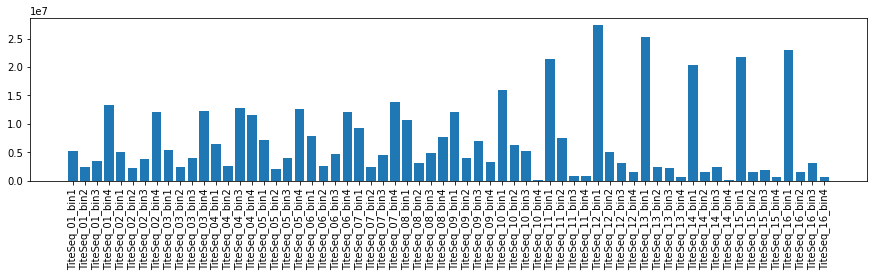

In [12]:
fig, ax = plt.subplots(figsize=(15,3))


ax.bar(N_y.index,N_y.values)
ax.set_xticklabels(N_y.index,rotation=90)
plt.show()


#### I approximated these values from Fig 2B

In [13]:
bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,250000]]))
#bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,200000]]))

bounds_df = pd.DataFrame(bounds,columns=['lower_bound','upper_bound'])
f_y_lower_bounds = bounds_df['lower_bound'].values
f_y_upper_bounds = bounds_df['upper_bound'].values
bounds_df

,lower_bound,upper_bound
0,0.000000,5.192957
1,5.192957,7.244228
2,7.244228,9.259131
3,9.259131,12.429216


I don't know how to obtain these values. I based them roughly on Figure 2 from Star et al

In [14]:
# mu_neg = np.log10(50)
# mu_pos = np.log10(70000)

# sigma_neg = 2.0
# sigma_pos = 2.0

# a = np.log10(10**(mu_pos) - 10**mu_neg)

# mu_neg = np.log10(50)
# mu_pos = np.log10(70000)

# mu_pos = 15.0 kd_WT = 1.0208168951388276e-05, trains well, scale kindof off.
# mu_pos = 12.5 kd_WT = 1.2361944572128138e-08
#mu_pos = 11.5 # Kd_WT = 1.6880063531355497e-10
#mu_pos = 11.0 # Kd_WT = 2.1441348615444062e-11
# mu_pos = 10 # kd_WT = 3.6290623182157056e-14, trains well but scale of
# mu_pos = 7.5 # trains well-ish but scale is really off
#mu_pos = 5.0 # doesn't work


# mu_pos = 11.5 # kd_WT = 4.09167643846012e-11
# mu_neg = 3 # kd_WT = 4.09167643846012e-11

mu_neg = 1
mu_pos = 11

sigma_neg = 2
sigma_pos = 2

# sigma 1
# 1.5 and 6 flat to rise
# 1.5 and 8 flat to rise (flattens at 10**-3)
# 1.5 and 10 flat to rise
# 1.5 and 20 doesn't work

# sigma 1.5
# 1.5 and 8 flat high
# 2 and 7 flat high
# 3.5 and 8 flat high
# 4 and 11 flat to rise (flattens at 10**-3)

# 3.5 and 5 doesn't work
# 3.5 and 8 flat to rise 
# 3.5 and 10 flat to rise 


#a = np.log10(10**(mu_pos) - 10**mu_neg)
a = 9

# a = 20, inference works, but scale of kd is off.

In [15]:
mu_pos, mu_neg,a

(11, 1, 9)

In [16]:
f_y_upper_bounds

array([ 5.19295685,  7.24422752,  9.25913054, 12.4292162 ])

In [17]:
#np.arange(10**(-13),10**(-6),10**(-12))
cs = [0,10**(-13),10**(-12.5),
     10**(-12),10**(-11.5),
     10**(-11),10**(-10.5),
     10**(-10),10**(-9.5),
     10**(-9),10**(-8.5),
     10**(-8),10**(-7.5),
     10**(-7),10**(-6.5),
     10**(-6)]

In [18]:
mp_list = [mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[4*mp_idx:4*mp_idx+4],
                                                         c=cs[mp_idx],
                                                         a=a,
                                                         Y=4,
                                                         mu_pos=mu_pos,
                                                         sigma_pos=sigma_pos,
                                                         mu_neg=mu_neg,
                                                         sigma_neg=sigma_neg,
                                                         f_y_lower_bounds=f_y_lower_bounds,
                                                         f_y_upper_bounds=f_y_upper_bounds,
                                                         info_for_layers_dict={'H_y_norm':0},
                                                         eta=1e-5,)
           for mp_idx in range(len(y_cols)//4)
          ]

In [19]:
# model = mavenn.Model2(gpmap=gpmap,
#                       mp_list=mp_list)

model = mavenn.Model2(gpmap=gpmap,
                      mp_list=mp_list)

In [20]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 4084)]      0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 4020)         0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 additive_gp_map_layer (Additiv  (None, 1)           4021        ['Sequence_only[0][0]']          
 eGPMapLayer)                                                                                     
                                                                                              

In [21]:
#y_train[y_cols_2]

In [22]:
# Set training data
model.set_data(x=x_train,
               
               y_list=[
                       y_train[y_cols[60:64]].values,
                       y_train[y_cols[56:60]].values,
                       y_train[y_cols[52:56]].values,
                       y_train[y_cols[48:52]].values,
                       y_train[y_cols[44:48]].values,
                       y_train[y_cols[40:44]].values,
                       y_train[y_cols[36:40]].values,
                       y_train[y_cols[32:36]].values,
                       y_train[y_cols[28:32]].values,
                       y_train[y_cols[24:28]].values,
                       y_train[y_cols[20:24]].values,
                       y_train[y_cols[16:20]].values,
                       y_train[y_cols[12:16]].values,
                       y_train[y_cols[8:12]].values,                   
                       y_train[y_cols[4:8]].values,                                      
                       y_train[y_cols[0:4]].values,                                                         
                      ],

               shuffle=True)

N = 165,825 observations set as training data.
Using 20.0% for validation.
Data shuffled.
Time to set data: 28.7 sec.


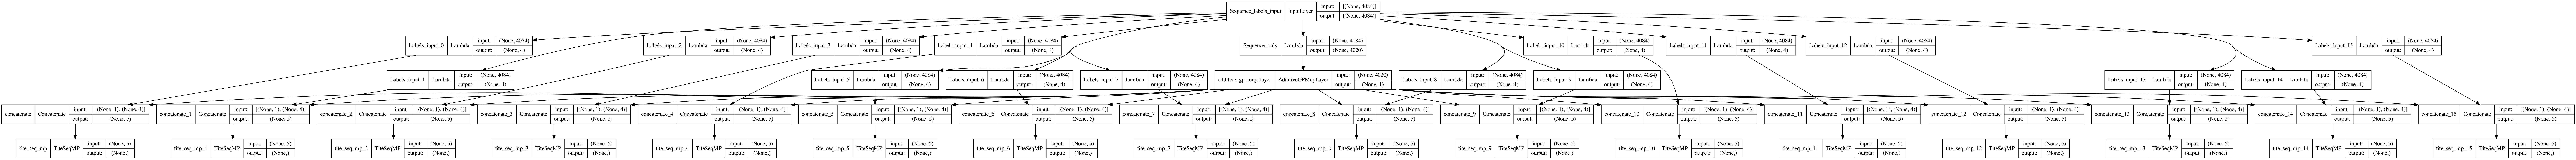

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200,to_file='titeseq_mp_16_heads.png')

In [24]:

# Fit model to data
model.fit(learning_rate=.00005,
          epochs=1000,
          batch_size=300,
          try_tqdm = False,
          early_stopping=True,
          early_stopping_patience=30,
          linear_initialization=False)

Epoch 1/1000
443/443 [==============================] - 22s 26ms/step - loss: 7759149.0000 - tite_seq_mp_loss: 349089.0938 - tite_seq_mp_1_loss: 232308.9375 - tite_seq_mp_2_loss: 210684.9062 - tite_seq_mp_3_loss: 243947.0625 - tite_seq_mp_4_loss: 393083.2188 - tite_seq_mp_5_loss: 223149.9844 - tite_seq_mp_6_loss: 366117.6562 - tite_seq_mp_7_loss: 591393.6250 - tite_seq_mp_8_loss: 709979.0625 - tite_seq_mp_9_loss: 987517.4375 - tite_seq_mp_10_loss: 795877.2500 - tite_seq_mp_11_loss: 688193.7500 - tite_seq_mp_12_loss: 694808.6875 - tite_seq_mp_13_loss: 520598.5312 - tite_seq_mp_14_loss: 406777.7188 - tite_seq_mp_15_loss: 345620.1250 - I_var: -10.8094 - val_loss: 2701611.0000 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 148519.2188 - val_tite_seq_mp_2_loss: 97722.3125 - val_tite_seq_mp_3_loss: 109781.4062 - val_tite_seq_mp_4_loss: 218029.8281 - val_tite_seq_mp_5_loss: 97860.5938 - val_tite_seq_mp_6_loss: 97132.1484 - val_tite_seq_mp_7_loss: 154159.7500 - val_tite_seq_mp_8

Epoch 7/1000
443/443 [==============================] - 6s 13ms/step - loss: 1763300.6250 - tite_seq_mp_loss: 349090.1562 - tite_seq_mp_1_loss: 65613.2500 - tite_seq_mp_2_loss: 38618.9141 - tite_seq_mp_3_loss: 42918.5938 - tite_seq_mp_4_loss: 65886.3516 - tite_seq_mp_5_loss: 46788.2031 - tite_seq_mp_6_loss: 50136.6445 - tite_seq_mp_7_loss: 75744.8750 - tite_seq_mp_8_loss: 116560.9531 - tite_seq_mp_9_loss: 208983.5469 - tite_seq_mp_10_loss: 115935.2578 - tite_seq_mp_11_loss: 113185.7812 - tite_seq_mp_12_loss: 117031.9688 - tite_seq_mp_13_loss: 134228.1719 - tite_seq_mp_14_loss: 103089.1094 - tite_seq_mp_15_loss: 119489.2969 - I_var: -2.6102 - val_loss: 1751903.2500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 59194.3320 - val_tite_seq_mp_2_loss: 40270.3477 - val_tite_seq_mp_3_loss: 40812.4688 - val_tite_seq_mp_4_loss: 67306.2578 - val_tite_seq_mp_5_loss: 48453.9570 - val_tite_seq_mp_6_loss: 50839.5977 - val_tite_seq_mp_7_loss: 75759.1797 - val_tite_seq_mp_8_loss: 114604

443/443 [==============================] - 5s 12ms/step - loss: 1750002.2500 - tite_seq_mp_loss: 349072.9375 - tite_seq_mp_1_loss: 64811.6953 - tite_seq_mp_2_loss: 38504.8359 - tite_seq_mp_3_loss: 42862.2500 - tite_seq_mp_4_loss: 65499.1445 - tite_seq_mp_5_loss: 46110.6250 - tite_seq_mp_6_loss: 48963.6523 - tite_seq_mp_7_loss: 74094.0938 - tite_seq_mp_8_loss: 114493.9688 - tite_seq_mp_9_loss: 206871.3594 - tite_seq_mp_10_loss: 114395.0703 - tite_seq_mp_11_loss: 111841.4688 - tite_seq_mp_12_loss: 116189.5156 - tite_seq_mp_13_loss: 133899.3125 - tite_seq_mp_14_loss: 102953.0703 - tite_seq_mp_15_loss: 119438.7266 - I_var: -2.6128 - val_loss: 1739573.1250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 58557.3477 - val_tite_seq_mp_2_loss: 40468.1016 - val_tite_seq_mp_3_loss: 40658.6172 - val_tite_seq_mp_4_loss: 67030.1719 - val_tite_seq_mp_5_loss: 47746.4180 - val_tite_seq_mp_6_loss: 49623.3828 - val_tite_seq_mp_7_loss: 74129.6953 - val_tite_seq_mp_8_loss: 112583.6172 - val_t

443/443 [==============================] - 6s 13ms/step - loss: 1738786.8750 - tite_seq_mp_loss: 349067.4375 - tite_seq_mp_1_loss: 65159.0469 - tite_seq_mp_2_loss: 38914.7852 - tite_seq_mp_3_loss: 43149.5625 - tite_seq_mp_4_loss: 65180.9766 - tite_seq_mp_5_loss: 45449.0352 - tite_seq_mp_6_loss: 47821.6875 - tite_seq_mp_7_loss: 72473.1719 - tite_seq_mp_8_loss: 112423.6328 - tite_seq_mp_9_loss: 204779.0000 - tite_seq_mp_10_loss: 112892.0391 - tite_seq_mp_11_loss: 110447.2578 - tite_seq_mp_12_loss: 115294.4375 - tite_seq_mp_13_loss: 133543.7344 - tite_seq_mp_14_loss: 102803.2578 - tite_seq_mp_15_loss: 119387.9766 - I_var: -2.6089 - val_loss: 1728401.2500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 58073.6758 - val_tite_seq_mp_2_loss: 39905.3438 - val_tite_seq_mp_3_loss: 40642.5859 - val_tite_seq_mp_4_loss: 66203.7109 - val_tite_seq_mp_5_loss: 47728.5312 - val_tite_seq_mp_6_loss: 49266.9219 - val_tite_seq_mp_7_loss: 73055.4609 - val_tite_seq_mp_8_loss: 111183.3594 - val_t

443/443 [==============================] - 5s 12ms/step - loss: 1727953.8750 - tite_seq_mp_loss: 349088.9375 - tite_seq_mp_1_loss: 66814.0938 - tite_seq_mp_2_loss: 39081.8320 - tite_seq_mp_3_loss: 42895.0156 - tite_seq_mp_4_loss: 65014.6445 - tite_seq_mp_5_loss: 44766.4336 - tite_seq_mp_6_loss: 46668.2031 - tite_seq_mp_7_loss: 70850.7969 - tite_seq_mp_8_loss: 110321.4219 - tite_seq_mp_9_loss: 202741.2344 - tite_seq_mp_10_loss: 111503.0156 - tite_seq_mp_11_loss: 108934.1875 - tite_seq_mp_12_loss: 114241.3047 - tite_seq_mp_13_loss: 133112.3906 - tite_seq_mp_14_loss: 102609.0938 - tite_seq_mp_15_loss: 119311.5391 - I_var: -2.6099 - val_loss: 1717269.0000 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 57863.7461 - val_tite_seq_mp_2_loss: 38718.9336 - val_tite_seq_mp_3_loss: 40619.2656 - val_tite_seq_mp_4_loss: 65553.9609 - val_tite_seq_mp_5_loss: 47656.7891 - val_tite_seq_mp_6_loss: 48854.5273 - val_tite_seq_mp_7_loss: 71982.0469 - val_tite_seq_mp_8_loss: 109750.8203 - val_t

443/443 [==============================] - 6s 13ms/step - loss: 1718228.6250 - tite_seq_mp_loss: 349089.2812 - tite_seq_mp_1_loss: 67577.3594 - tite_seq_mp_2_loss: 39022.3516 - tite_seq_mp_3_loss: 42856.5039 - tite_seq_mp_4_loss: 64466.1133 - tite_seq_mp_5_loss: 44518.1680 - tite_seq_mp_6_loss: 46004.2070 - tite_seq_mp_7_loss: 69644.2422 - tite_seq_mp_8_loss: 108735.9141 - tite_seq_mp_9_loss: 200686.5312 - tite_seq_mp_10_loss: 109805.0391 - tite_seq_mp_11_loss: 107791.1719 - tite_seq_mp_12_loss: 113520.2812 - tite_seq_mp_13_loss: 132786.1250 - tite_seq_mp_14_loss: 102466.5781 - tite_seq_mp_15_loss: 119258.3750 - I_var: -2.6091 - val_loss: 1709903.6250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 61328.9258 - val_tite_seq_mp_2_loss: 40275.6484 - val_tite_seq_mp_3_loss: 41591.4805 - val_tite_seq_mp_4_loss: 66318.0625 - val_tite_seq_mp_5_loss: 46152.2070 - val_tite_seq_mp_6_loss: 46646.1602 - val_tite_seq_mp_7_loss: 69808.2656 - val_tite_seq_mp_8_loss: 107018.6328 - val_t

443/443 [==============================] - 6s 13ms/step - loss: 1707325.2500 - tite_seq_mp_loss: 349089.3750 - tite_seq_mp_1_loss: 67540.8828 - tite_seq_mp_2_loss: 39413.0664 - tite_seq_mp_3_loss: 42861.1133 - tite_seq_mp_4_loss: 64204.3047 - tite_seq_mp_5_loss: 44074.7031 - tite_seq_mp_6_loss: 45181.6992 - tite_seq_mp_7_loss: 68292.6562 - tite_seq_mp_8_loss: 106921.7109 - tite_seq_mp_9_loss: 198634.9062 - tite_seq_mp_10_loss: 108306.3672 - tite_seq_mp_11_loss: 106432.8750 - tite_seq_mp_12_loss: 112566.8594 - tite_seq_mp_13_loss: 132353.7031 - tite_seq_mp_14_loss: 102267.5781 - tite_seq_mp_15_loss: 119182.6953 - I_var: -2.6043 - val_loss: 1705542.5000 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 65807.3438 - val_tite_seq_mp_2_loss: 42213.0117 - val_tite_seq_mp_3_loss: 42238.8906 - val_tite_seq_mp_4_loss: 67797.4453 - val_tite_seq_mp_5_loss: 44820.1680 - val_tite_seq_mp_6_loss: 44630.9375 - val_tite_seq_mp_7_loss: 67963.6875 - val_tite_seq_mp_8_loss: 104426.3203 - val_t

443/443 [==============================] - 5s 12ms/step - loss: 1697037.1250 - tite_seq_mp_loss: 349088.9062 - tite_seq_mp_1_loss: 68464.4531 - tite_seq_mp_2_loss: 39809.2422 - tite_seq_mp_3_loss: 43019.7383 - tite_seq_mp_4_loss: 64473.3477 - tite_seq_mp_5_loss: 43386.1250 - tite_seq_mp_6_loss: 44087.8477 - tite_seq_mp_7_loss: 66806.4844 - tite_seq_mp_8_loss: 104884.8047 - tite_seq_mp_9_loss: 196990.8125 - tite_seq_mp_10_loss: 107319.2109 - tite_seq_mp_11_loss: 104768.2734 - tite_seq_mp_12_loss: 111206.2812 - tite_seq_mp_13_loss: 131730.5938 - tite_seq_mp_14_loss: 101944.9062 - tite_seq_mp_15_loss: 119055.7578 - I_var: -2.6052 - val_loss: 1687701.7500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 58504.5000 - val_tite_seq_mp_2_loss: 39567.3516 - val_tite_seq_mp_3_loss: 40637.6523 - val_tite_seq_mp_4_loss: 64974.5312 - val_tite_seq_mp_5_loss: 46331.3945 - val_tite_seq_mp_6_loss: 46265.2812 - val_tite_seq_mp_7_loss: 68040.2344 - val_tite_seq_mp_8_loss: 104551.1953 - val_t

Epoch 49/1000
443/443 [==============================] - 5s 12ms/step - loss: 1686741.5000 - tite_seq_mp_loss: 349067.0938 - tite_seq_mp_1_loss: 67881.8906 - tite_seq_mp_2_loss: 39707.7031 - tite_seq_mp_3_loss: 43088.8633 - tite_seq_mp_4_loss: 64072.5234 - tite_seq_mp_5_loss: 43184.5625 - tite_seq_mp_6_loss: 43500.1641 - tite_seq_mp_7_loss: 65733.0625 - tite_seq_mp_8_loss: 103416.7188 - tite_seq_mp_9_loss: 195098.5156 - tite_seq_mp_10_loss: 105815.8438 - tite_seq_mp_11_loss: 103661.5781 - tite_seq_mp_12_loss: 110443.9141 - tite_seq_mp_13_loss: 131340.6719 - tite_seq_mp_14_loss: 101753.0000 - tite_seq_mp_15_loss: 118974.6875 - I_var: -2.6037 - val_loss: 1681219.5000 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 60531.8867 - val_tite_seq_mp_2_loss: 41209.9180 - val_tite_seq_mp_3_loss: 43246.0117 - val_tite_seq_mp_4_loss: 66258.7500 - val_tite_seq_mp_5_loss: 44887.6875 - val_tite_seq_mp_6_loss: 44128.2891 - val_tite_seq_mp_7_loss: 66077.0078 - val_tite_seq_mp_8_loss: 10194

443/443 [==============================] - 5s 12ms/step - loss: 1677930.6250 - tite_seq_mp_loss: 349089.4062 - tite_seq_mp_1_loss: 68286.0859 - tite_seq_mp_2_loss: 40344.1562 - tite_seq_mp_3_loss: 43684.0547 - tite_seq_mp_4_loss: 64150.7969 - tite_seq_mp_5_loss: 42779.1797 - tite_seq_mp_6_loss: 42680.2930 - tite_seq_mp_7_loss: 64507.1133 - tite_seq_mp_8_loss: 101699.8828 - tite_seq_mp_9_loss: 193497.7188 - tite_seq_mp_10_loss: 104763.1406 - tite_seq_mp_11_loss: 102224.6562 - tite_seq_mp_12_loss: 109235.0547 - tite_seq_mp_13_loss: 130734.1172 - tite_seq_mp_14_loss: 101421.1875 - tite_seq_mp_15_loss: 118834.9141 - I_var: -2.5981 - val_loss: 1672354.1250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 60299.1953 - val_tite_seq_mp_2_loss: 39883.8164 - val_tite_seq_mp_3_loss: 43146.4609 - val_tite_seq_mp_4_loss: 65100.1172 - val_tite_seq_mp_5_loss: 45420.5508 - val_tite_seq_mp_6_loss: 44522.1523 - val_tite_seq_mp_7_loss: 65563.4453 - val_tite_seq_mp_8_loss: 101181.6328 - val_t

443/443 [==============================] - 5s 12ms/step - loss: 1667430.8750 - tite_seq_mp_loss: 349085.6250 - tite_seq_mp_1_loss: 66940.0312 - tite_seq_mp_2_loss: 40057.1016 - tite_seq_mp_3_loss: 43775.1250 - tite_seq_mp_4_loss: 63895.5703 - tite_seq_mp_5_loss: 42667.8750 - tite_seq_mp_6_loss: 42285.4062 - tite_seq_mp_7_loss: 63585.5625 - tite_seq_mp_8_loss: 100388.9141 - tite_seq_mp_9_loss: 191626.2500 - tite_seq_mp_10_loss: 103285.4141 - tite_seq_mp_11_loss: 101169.0625 - tite_seq_mp_12_loss: 108464.3047 - tite_seq_mp_13_loss: 130297.8047 - tite_seq_mp_14_loss: 101187.3047 - tite_seq_mp_15_loss: 118718.5078 - I_var: -2.5819 - val_loss: 1666664.0000 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 62577.7031 - val_tite_seq_mp_2_loss: 41959.4609 - val_tite_seq_mp_3_loss: 43507.8750 - val_tite_seq_mp_4_loss: 67077.2344 - val_tite_seq_mp_5_loss: 44381.4844 - val_tite_seq_mp_6_loss: 42900.8477 - val_tite_seq_mp_7_loss: 64018.5352 - val_tite_seq_mp_8_loss: 99028.5703 - val_ti

443/443 [==============================] - 5s 12ms/step - loss: 1659679.5000 - tite_seq_mp_loss: 349089.5000 - tite_seq_mp_1_loss: 68551.7266 - tite_seq_mp_2_loss: 40643.6094 - tite_seq_mp_3_loss: 43832.4922 - tite_seq_mp_4_loss: 63981.6953 - tite_seq_mp_5_loss: 42308.0781 - tite_seq_mp_6_loss: 41564.1992 - tite_seq_mp_7_loss: 62496.3516 - tite_seq_mp_8_loss: 98805.8359 - tite_seq_mp_9_loss: 190195.4219 - tite_seq_mp_10_loss: 102335.6016 - tite_seq_mp_11_loss: 99741.0625 - tite_seq_mp_12_loss: 107190.6641 - tite_seq_mp_13_loss: 129616.3125 - tite_seq_mp_14_loss: 100785.8281 - tite_seq_mp_15_loss: 118541.5703 - I_var: -2.5795 - val_loss: 1655715.6250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 61885.7344 - val_tite_seq_mp_2_loss: 42576.1445 - val_tite_seq_mp_3_loss: 42311.2383 - val_tite_seq_mp_4_loss: 66151.1094 - val_tite_seq_mp_5_loss: 44195.8281 - val_tite_seq_mp_6_loss: 42391.9844 - val_tite_seq_mp_7_loss: 63089.9805 - val_tite_seq_mp_8_loss: 97685.6328 - val_tite

443/443 [==============================] - 5s 12ms/step - loss: 1650807.8750 - tite_seq_mp_loss: 348982.4062 - tite_seq_mp_1_loss: 68144.7344 - tite_seq_mp_2_loss: 40687.3125 - tite_seq_mp_3_loss: 43990.6406 - tite_seq_mp_4_loss: 63906.0859 - tite_seq_mp_5_loss: 42351.0000 - tite_seq_mp_6_loss: 41139.9922 - tite_seq_mp_7_loss: 61605.7266 - tite_seq_mp_8_loss: 97503.1484 - tite_seq_mp_9_loss: 188541.6719 - tite_seq_mp_10_loss: 101054.5625 - tite_seq_mp_11_loss: 98645.1484 - tite_seq_mp_12_loss: 106306.2578 - tite_seq_mp_13_loss: 129094.3984 - tite_seq_mp_14_loss: 100470.5703 - tite_seq_mp_15_loss: 118383.2891 - I_var: -2.5755 - val_loss: 1646882.5000 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 61323.7578 - val_tite_seq_mp_2_loss: 41924.0000 - val_tite_seq_mp_3_loss: 42271.1250 - val_tite_seq_mp_4_loss: 65635.2734 - val_tite_seq_mp_5_loss: 44373.6875 - val_tite_seq_mp_6_loss: 42345.9336 - val_tite_seq_mp_7_loss: 62395.4727 - val_tite_seq_mp_8_loss: 96673.5156 - val_tite

443/443 [==============================] - 5s 12ms/step - loss: 1645038.0000 - tite_seq_mp_loss: 349088.2812 - tite_seq_mp_1_loss: 69332.7109 - tite_seq_mp_2_loss: 40913.5312 - tite_seq_mp_3_loss: 44264.4297 - tite_seq_mp_4_loss: 63887.8320 - tite_seq_mp_5_loss: 42151.3750 - tite_seq_mp_6_loss: 40698.8867 - tite_seq_mp_7_loss: 60842.1875 - tite_seq_mp_8_loss: 96365.4062 - tite_seq_mp_9_loss: 187339.1250 - tite_seq_mp_10_loss: 100214.4766 - tite_seq_mp_11_loss: 97618.1562 - tite_seq_mp_12_loss: 105399.4062 - tite_seq_mp_13_loss: 128564.4609 - tite_seq_mp_14_loss: 100139.6328 - tite_seq_mp_15_loss: 118217.8359 - I_var: -2.5653 - val_loss: 1642283.1250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 62448.6367 - val_tite_seq_mp_2_loss: 42135.4453 - val_tite_seq_mp_3_loss: 43574.1602 - val_tite_seq_mp_4_loss: 66050.7734 - val_tite_seq_mp_5_loss: 44091.0820 - val_tite_seq_mp_6_loss: 41752.1797 - val_tite_seq_mp_7_loss: 61596.9844 - val_tite_seq_mp_8_loss: 95493.9609 - val_tite

443/443 [==============================] - 5s 12ms/step - loss: 1634952.5000 - tite_seq_mp_loss: 349085.3750 - tite_seq_mp_1_loss: 67239.0547 - tite_seq_mp_2_loss: 40804.5117 - tite_seq_mp_3_loss: 44426.7812 - tite_seq_mp_4_loss: 63500.7188 - tite_seq_mp_5_loss: 42005.3555 - tite_seq_mp_6_loss: 40505.5391 - tite_seq_mp_7_loss: 60094.2383 - tite_seq_mp_8_loss: 95261.8125 - tite_seq_mp_9_loss: 185593.8594 - tite_seq_mp_10_loss: 98768.4844 - tite_seq_mp_11_loss: 96761.6172 - tite_seq_mp_12_loss: 104769.3984 - tite_seq_mp_13_loss: 128167.3438 - tite_seq_mp_14_loss: 99886.5859 - tite_seq_mp_15_loss: 118081.9609 - I_var: -2.5594 - val_loss: 1643782.6250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 66741.1094 - val_tite_seq_mp_2_loss: 44620.5156 - val_tite_seq_mp_3_loss: 46223.3008 - val_tite_seq_mp_4_loss: 68613.3906 - val_tite_seq_mp_5_loss: 43391.1289 - val_tite_seq_mp_6_loss: 40530.0195 - val_tite_seq_mp_7_loss: 60617.1289 - val_tite_seq_mp_8_loss: 93862.0312 - val_tite_s

443/443 [==============================] - 5s 12ms/step - loss: 1629547.8750 - tite_seq_mp_loss: 349089.3438 - tite_seq_mp_1_loss: 68149.7422 - tite_seq_mp_2_loss: 41199.3125 - tite_seq_mp_3_loss: 44864.7891 - tite_seq_mp_4_loss: 63953.7969 - tite_seq_mp_5_loss: 42135.0625 - tite_seq_mp_6_loss: 39987.2422 - tite_seq_mp_7_loss: 59335.2344 - tite_seq_mp_8_loss: 94099.7188 - tite_seq_mp_9_loss: 184629.2500 - tite_seq_mp_10_loss: 98200.4062 - tite_seq_mp_11_loss: 95603.5781 - tite_seq_mp_12_loss: 103603.0859 - tite_seq_mp_13_loss: 127453.3594 - tite_seq_mp_14_loss: 99412.9844 - tite_seq_mp_15_loss: 117830.3984 - I_var: -2.5540 - val_loss: 1632359.2500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 63349.5234 - val_tite_seq_mp_2_loss: 41866.5703 - val_tite_seq_mp_3_loss: 44962.5625 - val_tite_seq_mp_4_loss: 66328.2891 - val_tite_seq_mp_5_loss: 44378.3125 - val_tite_seq_mp_6_loss: 41648.2500 - val_tite_seq_mp_7_loss: 60438.9258 - val_tite_seq_mp_8_loss: 93717.2188 - val_tite_s

443/443 [==============================] - 5s 12ms/step - loss: 1622980.8750 - tite_seq_mp_loss: 349090.2188 - tite_seq_mp_1_loss: 67930.8438 - tite_seq_mp_2_loss: 41310.4062 - tite_seq_mp_3_loss: 45054.6523 - tite_seq_mp_4_loss: 64323.1758 - tite_seq_mp_5_loss: 41902.8633 - tite_seq_mp_6_loss: 39679.6328 - tite_seq_mp_7_loss: 58710.5898 - tite_seq_mp_8_loss: 93137.1406 - tite_seq_mp_9_loss: 183527.0625 - tite_seq_mp_10_loss: 97399.3438 - tite_seq_mp_11_loss: 94655.4531 - tite_seq_mp_12_loss: 102727.3984 - tite_seq_mp_13_loss: 126888.3047 - tite_seq_mp_14_loss: 99026.2188 - tite_seq_mp_15_loss: 117617.3359 - I_var: -2.5523 - val_loss: 1626539.2500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 63039.8594 - val_tite_seq_mp_2_loss: 42797.6797 - val_tite_seq_mp_3_loss: 46142.9648 - val_tite_seq_mp_4_loss: 66992.0469 - val_tite_seq_mp_5_loss: 43934.7461 - val_tite_seq_mp_6_loss: 40822.3906 - val_tite_seq_mp_7_loss: 59621.3750 - val_tite_seq_mp_8_loss: 92493.0078 - val_tite_s

443/443 [==============================] - 5s 12ms/step - loss: 1617661.6250 - tite_seq_mp_loss: 349087.6875 - tite_seq_mp_1_loss: 68528.9219 - tite_seq_mp_2_loss: 41680.0977 - tite_seq_mp_3_loss: 45334.0000 - tite_seq_mp_4_loss: 64312.9570 - tite_seq_mp_5_loss: 41917.1562 - tite_seq_mp_6_loss: 39361.3945 - tite_seq_mp_7_loss: 58092.5664 - tite_seq_mp_8_loss: 92184.2578 - tite_seq_mp_9_loss: 182424.8594 - tite_seq_mp_10_loss: 96597.7188 - tite_seq_mp_11_loss: 93778.8750 - tite_seq_mp_12_loss: 101924.7031 - tite_seq_mp_13_loss: 126364.5547 - tite_seq_mp_14_loss: 98663.9219 - tite_seq_mp_15_loss: 117407.6953 - I_var: -2.5382 - val_loss: 1625137.1250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 65747.0859 - val_tite_seq_mp_2_loss: 44692.3594 - val_tite_seq_mp_3_loss: 46796.2891 - val_tite_seq_mp_4_loss: 69077.5391 - val_tite_seq_mp_5_loss: 43290.1953 - val_tite_seq_mp_6_loss: 39775.2188 - val_tite_seq_mp_7_loss: 58918.1797 - val_tite_seq_mp_8_loss: 91263.7266 - val_tite_s

443/443 [==============================] - 5s 12ms/step - loss: 1611014.3750 - tite_seq_mp_loss: 349086.9062 - tite_seq_mp_1_loss: 68782.2891 - tite_seq_mp_2_loss: 41640.8242 - tite_seq_mp_3_loss: 46172.5312 - tite_seq_mp_4_loss: 64366.3164 - tite_seq_mp_5_loss: 41844.3945 - tite_seq_mp_6_loss: 39036.4414 - tite_seq_mp_7_loss: 57410.3672 - tite_seq_mp_8_loss: 91117.0703 - tite_seq_mp_9_loss: 181180.5312 - tite_seq_mp_10_loss: 95706.3906 - tite_seq_mp_11_loss: 92738.9531 - tite_seq_mp_12_loss: 100925.4922 - tite_seq_mp_13_loss: 125693.0781 - tite_seq_mp_14_loss: 98187.2656 - tite_seq_mp_15_loss: 117125.5781 - I_var: -2.5248 - val_loss: 1613040.6250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 61413.3281 - val_tite_seq_mp_2_loss: 42539.1719 - val_tite_seq_mp_3_loss: 46072.0352 - val_tite_seq_mp_4_loss: 66695.3359 - val_tite_seq_mp_5_loss: 44786.6094 - val_tite_seq_mp_6_loss: 40621.3438 - val_tite_seq_mp_7_loss: 58534.2070 - val_tite_seq_mp_8_loss: 90792.4609 - val_tite_s

443/443 [==============================] - 5s 11ms/step - loss: 1605084.6250 - tite_seq_mp_loss: 349081.2500 - tite_seq_mp_1_loss: 69190.7969 - tite_seq_mp_2_loss: 42049.8867 - tite_seq_mp_3_loss: 46561.6953 - tite_seq_mp_4_loss: 64647.8555 - tite_seq_mp_5_loss: 41792.4883 - tite_seq_mp_6_loss: 38768.7422 - tite_seq_mp_7_loss: 56751.7734 - tite_seq_mp_8_loss: 90091.0312 - tite_seq_mp_9_loss: 179897.7500 - tite_seq_mp_10_loss: 94786.3750 - tite_seq_mp_11_loss: 91796.9453 - tite_seq_mp_12_loss: 100033.4453 - tite_seq_mp_13_loss: 125065.6250 - tite_seq_mp_14_loss: 97729.7344 - tite_seq_mp_15_loss: 116838.6250 - I_var: -2.5143 - val_loss: 1608009.6250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 62498.1602 - val_tite_seq_mp_2_loss: 42904.5234 - val_tite_seq_mp_3_loss: 46760.3867 - val_tite_seq_mp_4_loss: 67285.5391 - val_tite_seq_mp_5_loss: 44584.0469 - val_tite_seq_mp_6_loss: 40134.9023 - val_tite_seq_mp_7_loss: 57851.9844 - val_tite_seq_mp_8_loss: 89719.4453 - val_tite_s

443/443 [==============================] - 5s 12ms/step - loss: 1598394.7500 - tite_seq_mp_loss: 349087.6875 - tite_seq_mp_1_loss: 69124.6484 - tite_seq_mp_2_loss: 42219.9805 - tite_seq_mp_3_loss: 46352.3906 - tite_seq_mp_4_loss: 65003.6250 - tite_seq_mp_5_loss: 41776.4961 - tite_seq_mp_6_loss: 38514.7617 - tite_seq_mp_7_loss: 56166.5469 - tite_seq_mp_8_loss: 89151.1797 - tite_seq_mp_9_loss: 178774.3906 - tite_seq_mp_10_loss: 93947.8359 - tite_seq_mp_11_loss: 90873.4531 - tite_seq_mp_12_loss: 99148.4688 - tite_seq_mp_13_loss: 124445.7891 - tite_seq_mp_14_loss: 97262.6406 - tite_seq_mp_15_loss: 116545.0391 - I_var: -2.5023 - val_loss: 1602381.8750 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 62497.2695 - val_tite_seq_mp_2_loss: 44275.0586 - val_tite_seq_mp_3_loss: 47007.7422 - val_tite_seq_mp_4_loss: 67625.3359 - val_tite_seq_mp_5_loss: 43852.1289 - val_tite_seq_mp_6_loss: 39822.4727 - val_tite_seq_mp_7_loss: 57260.7305 - val_tite_seq_mp_8_loss: 88789.1641 - val_tite_se

443/443 [==============================] - 5s 12ms/step - loss: 1593825.6250 - tite_seq_mp_loss: 349088.9062 - tite_seq_mp_1_loss: 69610.7344 - tite_seq_mp_2_loss: 42622.9961 - tite_seq_mp_3_loss: 47296.8047 - tite_seq_mp_4_loss: 65106.6602 - tite_seq_mp_5_loss: 41907.3828 - tite_seq_mp_6_loss: 38331.9531 - tite_seq_mp_7_loss: 55624.8320 - tite_seq_mp_8_loss: 88267.9531 - tite_seq_mp_9_loss: 177647.9531 - tite_seq_mp_10_loss: 93078.9609 - tite_seq_mp_11_loss: 90024.5781 - tite_seq_mp_12_loss: 98327.8516 - tite_seq_mp_13_loss: 123847.5391 - tite_seq_mp_14_loss: 96799.2344 - tite_seq_mp_15_loss: 116241.3359 - I_var: -2.4975 - val_loss: 1599580.7500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 64428.5469 - val_tite_seq_mp_2_loss: 44794.6641 - val_tite_seq_mp_3_loss: 47889.2227 - val_tite_seq_mp_4_loss: 68434.8125 - val_tite_seq_mp_5_loss: 44060.9961 - val_tite_seq_mp_6_loss: 39364.3438 - val_tite_seq_mp_7_loss: 56675.6914 - val_tite_seq_mp_8_loss: 87828.7422 - val_tite_se

443/443 [==============================] - 5s 12ms/step - loss: 1587870.6250 - tite_seq_mp_loss: 349069.5938 - tite_seq_mp_1_loss: 69501.8281 - tite_seq_mp_2_loss: 43246.3828 - tite_seq_mp_3_loss: 47602.9531 - tite_seq_mp_4_loss: 65601.7578 - tite_seq_mp_5_loss: 41680.1719 - tite_seq_mp_6_loss: 38026.3789 - tite_seq_mp_7_loss: 55043.3438 - tite_seq_mp_8_loss: 87341.0625 - tite_seq_mp_9_loss: 176653.9531 - tite_seq_mp_10_loss: 92412.3906 - tite_seq_mp_11_loss: 89069.7109 - tite_seq_mp_12_loss: 97357.1172 - tite_seq_mp_13_loss: 123140.2031 - tite_seq_mp_14_loss: 96251.4922 - tite_seq_mp_15_loss: 115872.6875 - I_var: -2.4862 - val_loss: 1595081.6250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 63192.7812 - val_tite_seq_mp_2_loss: 44758.1328 - val_tite_seq_mp_3_loss: 49082.6875 - val_tite_seq_mp_4_loss: 67756.7891 - val_tite_seq_mp_5_loss: 44527.6055 - val_tite_seq_mp_6_loss: 39791.6875 - val_tite_seq_mp_7_loss: 56342.8359 - val_tite_seq_mp_8_loss: 87244.4062 - val_tite_se

443/443 [==============================] - 5s 12ms/step - loss: 1582160.3750 - tite_seq_mp_loss: 349085.1875 - tite_seq_mp_1_loss: 70097.2500 - tite_seq_mp_2_loss: 42842.8047 - tite_seq_mp_3_loss: 47601.1055 - tite_seq_mp_4_loss: 65230.6836 - tite_seq_mp_5_loss: 41832.4883 - tite_seq_mp_6_loss: 37936.7617 - tite_seq_mp_7_loss: 54556.9648 - tite_seq_mp_8_loss: 86567.7969 - tite_seq_mp_9_loss: 175493.2188 - tite_seq_mp_10_loss: 91482.1797 - tite_seq_mp_11_loss: 88421.6641 - tite_seq_mp_12_loss: 96797.9844 - tite_seq_mp_13_loss: 122699.5469 - tite_seq_mp_14_loss: 95896.6250 - tite_seq_mp_15_loss: 115616.9453 - I_var: -2.4733 - val_loss: 1594819.3750 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 67480.2812 - val_tite_seq_mp_2_loss: 45937.9883 - val_tite_seq_mp_3_loss: 50498.0039 - val_tite_seq_mp_4_loss: 69637.2578 - val_tite_seq_mp_5_loss: 44527.3750 - val_tite_seq_mp_6_loss: 38607.6250 - val_tite_seq_mp_7_loss: 55719.8789 - val_tite_seq_mp_8_loss: 86187.5859 - val_tite_se

443/443 [==============================] - 5s 12ms/step - loss: 1577281.1250 - tite_seq_mp_loss: 349088.5000 - tite_seq_mp_1_loss: 69796.2109 - tite_seq_mp_2_loss: 43355.4648 - tite_seq_mp_3_loss: 48435.1641 - tite_seq_mp_4_loss: 65881.8750 - tite_seq_mp_5_loss: 41963.5039 - tite_seq_mp_6_loss: 37715.6328 - tite_seq_mp_7_loss: 54067.7930 - tite_seq_mp_8_loss: 85723.0703 - tite_seq_mp_9_loss: 174562.9844 - tite_seq_mp_10_loss: 90874.9141 - tite_seq_mp_11_loss: 87514.5391 - tite_seq_mp_12_loss: 95816.0547 - tite_seq_mp_13_loss: 121968.5547 - tite_seq_mp_14_loss: 95302.8828 - tite_seq_mp_15_loss: 115213.0156 - I_var: -2.4595 - val_loss: 1585394.0000 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 64811.3125 - val_tite_seq_mp_2_loss: 44587.6992 - val_tite_seq_mp_3_loss: 50020.3945 - val_tite_seq_mp_4_loss: 68495.9688 - val_tite_seq_mp_5_loss: 44399.0000 - val_tite_seq_mp_6_loss: 39191.6250 - val_tite_seq_mp_7_loss: 55326.7773 - val_tite_seq_mp_8_loss: 85608.7031 - val_tite_se

Epoch 147/1000
443/443 [==============================] - 5s 12ms/step - loss: 1572857.0000 - tite_seq_mp_loss: 349089.6562 - tite_seq_mp_1_loss: 70648.1406 - tite_seq_mp_2_loss: 43801.3594 - tite_seq_mp_3_loss: 48445.3164 - tite_seq_mp_4_loss: 66263.6875 - tite_seq_mp_5_loss: 41858.3281 - tite_seq_mp_6_loss: 37571.7500 - tite_seq_mp_7_loss: 53628.6133 - tite_seq_mp_8_loss: 84976.0938 - tite_seq_mp_9_loss: 173648.3281 - tite_seq_mp_10_loss: 90196.3828 - tite_seq_mp_11_loss: 86724.0469 - tite_seq_mp_12_loss: 95018.2891 - tite_seq_mp_13_loss: 121346.7031 - tite_seq_mp_14_loss: 94795.1719 - tite_seq_mp_15_loss: 114845.1016 - I_var: -2.4386 - val_loss: 1581558.1250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 65511.2461 - val_tite_seq_mp_2_loss: 44955.6484 - val_tite_seq_mp_3_loss: 50285.9180 - val_tite_seq_mp_4_loss: 68509.8672 - val_tite_seq_mp_5_loss: 44510.9492 - val_tite_seq_mp_6_loss: 39148.1523 - val_tite_seq_mp_7_loss: 54907.9531 - val_tite_seq_mp_8_loss: 84914.054

443/443 [==============================] - 5s 12ms/step - loss: 1569666.8750 - tite_seq_mp_loss: 349088.5000 - tite_seq_mp_1_loss: 70452.3203 - tite_seq_mp_2_loss: 44129.3398 - tite_seq_mp_3_loss: 49069.0430 - tite_seq_mp_4_loss: 66791.1875 - tite_seq_mp_5_loss: 42070.7695 - tite_seq_mp_6_loss: 37458.2344 - tite_seq_mp_7_loss: 53269.8906 - tite_seq_mp_8_loss: 84393.9688 - tite_seq_mp_9_loss: 172872.4844 - tite_seq_mp_10_loss: 89618.7109 - tite_seq_mp_11_loss: 86151.7109 - tite_seq_mp_12_loss: 94443.5625 - tite_seq_mp_13_loss: 120891.7266 - tite_seq_mp_14_loss: 94406.7969 - tite_seq_mp_15_loss: 114557.7266 - I_var: -2.4417 - val_loss: 1579457.8750 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 67278.0078 - val_tite_seq_mp_2_loss: 44591.1875 - val_tite_seq_mp_3_loss: 50486.8672 - val_tite_seq_mp_4_loss: 69522.9531 - val_tite_seq_mp_5_loss: 45075.6719 - val_tite_seq_mp_6_loss: 38815.1719 - val_tite_seq_mp_7_loss: 54541.3867 - val_tite_seq_mp_8_loss: 84290.2109 - val_tite_se

443/443 [==============================] - 5s 12ms/step - loss: 1566057.8750 - tite_seq_mp_loss: 349087.1250 - tite_seq_mp_1_loss: 71278.2109 - tite_seq_mp_2_loss: 44130.3438 - tite_seq_mp_3_loss: 50303.6680 - tite_seq_mp_4_loss: 67111.3750 - tite_seq_mp_5_loss: 42127.8516 - tite_seq_mp_6_loss: 37332.8164 - tite_seq_mp_7_loss: 52864.1758 - tite_seq_mp_8_loss: 83645.7422 - tite_seq_mp_9_loss: 171989.9062 - tite_seq_mp_10_loss: 88977.0703 - tite_seq_mp_11_loss: 85359.4766 - tite_seq_mp_12_loss: 93617.3984 - tite_seq_mp_13_loss: 120236.5391 - tite_seq_mp_14_loss: 93851.0781 - tite_seq_mp_15_loss: 114144.1641 - I_var: -2.4234 - val_loss: 1576648.6250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 68057.5781 - val_tite_seq_mp_2_loss: 44879.1953 - val_tite_seq_mp_3_loss: 49166.4180 - val_tite_seq_mp_4_loss: 71165.4453 - val_tite_seq_mp_5_loss: 45358.6719 - val_tite_seq_mp_6_loss: 38946.8477 - val_tite_seq_mp_7_loss: 54197.2773 - val_tite_seq_mp_8_loss: 83701.0938 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1563764.7500 - tite_seq_mp_loss: 349087.1562 - tite_seq_mp_1_loss: 72679.6094 - tite_seq_mp_2_loss: 44880.6641 - tite_seq_mp_3_loss: 50884.3477 - tite_seq_mp_4_loss: 68033.3984 - tite_seq_mp_5_loss: 42139.1992 - tite_seq_mp_6_loss: 37098.3359 - tite_seq_mp_7_loss: 52488.0547 - tite_seq_mp_8_loss: 82998.9766 - tite_seq_mp_9_loss: 171356.2344 - tite_seq_mp_10_loss: 88630.2422 - tite_seq_mp_11_loss: 84541.7344 - tite_seq_mp_12_loss: 92653.9375 - tite_seq_mp_13_loss: 119458.1094 - tite_seq_mp_14_loss: 93187.2109 - tite_seq_mp_15_loss: 113646.6484 - I_var: -2.3972 - val_loss: 1569268.0000 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 66234.7266 - val_tite_seq_mp_2_loss: 45363.0078 - val_tite_seq_mp_3_loss: 49813.5234 - val_tite_seq_mp_4_loss: 69513.2891 - val_tite_seq_mp_5_loss: 45445.8828 - val_tite_seq_mp_6_loss: 38801.5820 - val_tite_seq_mp_7_loss: 53875.5391 - val_tite_seq_mp_8_loss: 83082.4844 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1558637.6250 - tite_seq_mp_loss: 349053.2812 - tite_seq_mp_1_loss: 72315.8516 - tite_seq_mp_2_loss: 44657.2891 - tite_seq_mp_3_loss: 50171.9141 - tite_seq_mp_4_loss: 68117.7656 - tite_seq_mp_5_loss: 42263.5586 - tite_seq_mp_6_loss: 37158.5625 - tite_seq_mp_7_loss: 52163.9805 - tite_seq_mp_8_loss: 82472.6562 - tite_seq_mp_9_loss: 170360.0312 - tite_seq_mp_10_loss: 87770.9141 - tite_seq_mp_11_loss: 84130.5781 - tite_seq_mp_12_loss: 92376.2266 - tite_seq_mp_13_loss: 119212.8438 - tite_seq_mp_14_loss: 92961.8594 - tite_seq_mp_15_loss: 113448.6406 - I_var: -2.3906 - val_loss: 1570061.7500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 68957.4062 - val_tite_seq_mp_2_loss: 46173.6484 - val_tite_seq_mp_3_loss: 50826.6328 - val_tite_seq_mp_4_loss: 70674.4062 - val_tite_seq_mp_5_loss: 46056.4570 - val_tite_seq_mp_6_loss: 38506.3828 - val_tite_seq_mp_7_loss: 53488.7852 - val_tite_seq_mp_8_loss: 82498.1172 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1555988.3750 - tite_seq_mp_loss: 349088.7500 - tite_seq_mp_1_loss: 72845.8438 - tite_seq_mp_2_loss: 45692.6953 - tite_seq_mp_3_loss: 51360.5078 - tite_seq_mp_4_loss: 68532.0078 - tite_seq_mp_5_loss: 42268.1367 - tite_seq_mp_6_loss: 37007.3711 - tite_seq_mp_7_loss: 51822.2305 - tite_seq_mp_8_loss: 81851.5312 - tite_seq_mp_9_loss: 169696.6250 - tite_seq_mp_10_loss: 87337.4844 - tite_seq_mp_11_loss: 83343.9844 - tite_seq_mp_12_loss: 91448.6016 - tite_seq_mp_13_loss: 118456.5078 - tite_seq_mp_14_loss: 92290.9375 - tite_seq_mp_15_loss: 112943.6406 - I_var: -2.3788 - val_loss: 1567240.1250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 69195.3750 - val_tite_seq_mp_2_loss: 46769.1758 - val_tite_seq_mp_3_loss: 51075.4062 - val_tite_seq_mp_4_loss: 72596.4219 - val_tite_seq_mp_5_loss: 45521.0742 - val_tite_seq_mp_6_loss: 38222.7656 - val_tite_seq_mp_7_loss: 53176.8242 - val_tite_seq_mp_8_loss: 81934.6328 - val_tite_se

443/443 [==============================] - 5s 10ms/step - loss: 1552010.5000 - tite_seq_mp_loss: 349089.5938 - tite_seq_mp_1_loss: 72982.9688 - tite_seq_mp_2_loss: 45341.3125 - tite_seq_mp_3_loss: 51509.6562 - tite_seq_mp_4_loss: 68351.7344 - tite_seq_mp_5_loss: 42381.5352 - tite_seq_mp_6_loss: 37024.1289 - tite_seq_mp_7_loss: 51506.6875 - tite_seq_mp_8_loss: 81321.2812 - tite_seq_mp_9_loss: 168873.4531 - tite_seq_mp_10_loss: 86674.1016 - tite_seq_mp_11_loss: 82943.0234 - tite_seq_mp_12_loss: 91121.9297 - tite_seq_mp_13_loss: 118162.9688 - tite_seq_mp_14_loss: 92025.2969 - tite_seq_mp_15_loss: 112698.9531 - I_var: -2.3696 - val_loss: 1563365.1250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 69918.1797 - val_tite_seq_mp_2_loss: 46538.6406 - val_tite_seq_mp_3_loss: 50742.0391 - val_tite_seq_mp_4_loss: 72063.3281 - val_tite_seq_mp_5_loss: 45623.4258 - val_tite_seq_mp_6_loss: 38465.5234 - val_tite_seq_mp_7_loss: 52870.6562 - val_tite_seq_mp_8_loss: 81403.3281 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1547860.0000 - tite_seq_mp_loss: 349076.5625 - tite_seq_mp_1_loss: 73231.9766 - tite_seq_mp_2_loss: 45371.8711 - tite_seq_mp_3_loss: 51416.9297 - tite_seq_mp_4_loss: 68686.1719 - tite_seq_mp_5_loss: 42461.9414 - tite_seq_mp_6_loss: 36941.9102 - tite_seq_mp_7_loss: 51171.8242 - tite_seq_mp_8_loss: 80768.3438 - tite_seq_mp_9_loss: 168103.3281 - tite_seq_mp_10_loss: 86101.6562 - tite_seq_mp_11_loss: 82371.2031 - tite_seq_mp_12_loss: 90550.4375 - tite_seq_mp_13_loss: 117675.6094 - tite_seq_mp_14_loss: 91588.1719 - tite_seq_mp_15_loss: 112340.8906 - I_var: -2.3532 - val_loss: 1566028.5000 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 70422.1328 - val_tite_seq_mp_2_loss: 47923.7695 - val_tite_seq_mp_3_loss: 55433.9961 - val_tite_seq_mp_4_loss: 74222.6406 - val_tite_seq_mp_5_loss: 45432.4023 - val_tite_seq_mp_6_loss: 37758.4219 - val_tite_seq_mp_7_loss: 52752.4648 - val_tite_seq_mp_8_loss: 81027.3359 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1545998.6250 - tite_seq_mp_loss: 349088.2812 - tite_seq_mp_1_loss: 73820.1016 - tite_seq_mp_2_loss: 46143.6992 - tite_seq_mp_3_loss: 52027.6914 - tite_seq_mp_4_loss: 69479.1719 - tite_seq_mp_5_loss: 42517.1055 - tite_seq_mp_6_loss: 36869.6289 - tite_seq_mp_7_loss: 50907.5195 - tite_seq_mp_8_loss: 80279.6172 - tite_seq_mp_9_loss: 167531.2969 - tite_seq_mp_10_loss: 85713.4297 - tite_seq_mp_11_loss: 81749.0391 - tite_seq_mp_12_loss: 89841.5547 - tite_seq_mp_13_loss: 117077.1953 - tite_seq_mp_14_loss: 91048.4062 - tite_seq_mp_15_loss: 111903.5312 - I_var: -2.3359 - val_loss: 1562349.8750 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 69162.7812 - val_tite_seq_mp_2_loss: 47881.7070 - val_tite_seq_mp_3_loss: 55633.2266 - val_tite_seq_mp_4_loss: 72995.8125 - val_tite_seq_mp_5_loss: 46920.6758 - val_tite_seq_mp_6_loss: 38250.8477 - val_tite_seq_mp_7_loss: 52342.1016 - val_tite_seq_mp_8_loss: 80486.1953 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1542002.5000 - tite_seq_mp_loss: 349088.6875 - tite_seq_mp_1_loss: 73621.1484 - tite_seq_mp_2_loss: 46379.7305 - tite_seq_mp_3_loss: 52454.4531 - tite_seq_mp_4_loss: 69159.4062 - tite_seq_mp_5_loss: 42585.8984 - tite_seq_mp_6_loss: 36811.4180 - tite_seq_mp_7_loss: 50631.0469 - tite_seq_mp_8_loss: 79807.8594 - tite_seq_mp_9_loss: 166899.5469 - tite_seq_mp_10_loss: 85247.0156 - tite_seq_mp_11_loss: 81245.8984 - tite_seq_mp_12_loss: 89311.7109 - tite_seq_mp_13_loss: 116611.6016 - tite_seq_mp_14_loss: 90613.1875 - tite_seq_mp_15_loss: 111532.6328 - I_var: -2.3315 - val_loss: 1556120.5000 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 69448.3828 - val_tite_seq_mp_2_loss: 47070.8945 - val_tite_seq_mp_3_loss: 53655.8711 - val_tite_seq_mp_4_loss: 73153.2891 - val_tite_seq_mp_5_loss: 46120.5703 - val_tite_seq_mp_6_loss: 38536.5078 - val_tite_seq_mp_7_loss: 52085.8203 - val_tite_seq_mp_8_loss: 80001.4375 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1539659.3750 - tite_seq_mp_loss: 349089.5000 - tite_seq_mp_1_loss: 73953.5547 - tite_seq_mp_2_loss: 46774.1523 - tite_seq_mp_3_loss: 53126.9727 - tite_seq_mp_4_loss: 69377.7109 - tite_seq_mp_5_loss: 42770.2578 - tite_seq_mp_6_loss: 36787.9258 - tite_seq_mp_7_loss: 50381.3125 - tite_seq_mp_8_loss: 79332.7812 - tite_seq_mp_9_loss: 166246.0156 - tite_seq_mp_10_loss: 84759.1406 - tite_seq_mp_11_loss: 80753.6953 - tite_seq_mp_12_loss: 88790.8438 - tite_seq_mp_13_loss: 116163.3672 - tite_seq_mp_14_loss: 90180.5234 - tite_seq_mp_15_loss: 111169.7656 - I_var: -2.3167 - val_loss: 1561573.7500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 73470.0078 - val_tite_seq_mp_2_loss: 49129.6367 - val_tite_seq_mp_3_loss: 56732.0820 - val_tite_seq_mp_4_loss: 75711.2812 - val_tite_seq_mp_5_loss: 45568.7070 - val_tite_seq_mp_6_loss: 37665.9805 - val_tite_seq_mp_7_loss: 52088.7461 - val_tite_seq_mp_8_loss: 79866.9531 - val_tite_se

443/443 [==============================] - 5s 10ms/step - loss: 1538126.0000 - tite_seq_mp_loss: 349006.1562 - tite_seq_mp_1_loss: 75190.2266 - tite_seq_mp_2_loss: 46647.8828 - tite_seq_mp_3_loss: 53824.9648 - tite_seq_mp_4_loss: 69711.0625 - tite_seq_mp_5_loss: 42883.6328 - tite_seq_mp_6_loss: 36801.6758 - tite_seq_mp_7_loss: 50162.0742 - tite_seq_mp_8_loss: 78945.0469 - tite_seq_mp_9_loss: 165646.0781 - tite_seq_mp_10_loss: 84280.8672 - tite_seq_mp_11_loss: 80311.7188 - tite_seq_mp_12_loss: 88336.3906 - tite_seq_mp_13_loss: 115754.8281 - tite_seq_mp_14_loss: 89794.2422 - tite_seq_mp_15_loss: 110828.2500 - I_var: -2.3040 - val_loss: 1555274.6250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 71431.1641 - val_tite_seq_mp_2_loss: 48125.7031 - val_tite_seq_mp_3_loss: 55683.8359 - val_tite_seq_mp_4_loss: 74974.3594 - val_tite_seq_mp_5_loss: 47387.3594 - val_tite_seq_mp_6_loss: 37940.0781 - val_tite_seq_mp_7_loss: 51718.1680 - val_tite_seq_mp_8_loss: 79264.4922 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1535219.5000 - tite_seq_mp_loss: 349064.3438 - tite_seq_mp_1_loss: 75500.3828 - tite_seq_mp_2_loss: 46801.0312 - tite_seq_mp_3_loss: 53549.2031 - tite_seq_mp_4_loss: 70061.6094 - tite_seq_mp_5_loss: 42996.3125 - tite_seq_mp_6_loss: 36842.7812 - tite_seq_mp_7_loss: 49944.2656 - tite_seq_mp_8_loss: 78516.0156 - tite_seq_mp_9_loss: 164974.0469 - tite_seq_mp_10_loss: 83766.8672 - tite_seq_mp_11_loss: 79896.7734 - tite_seq_mp_12_loss: 87935.3281 - tite_seq_mp_13_loss: 115396.8359 - tite_seq_mp_14_loss: 89449.1797 - tite_seq_mp_15_loss: 110522.4531 - I_var: -2.2913 - val_loss: 1559583.2500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 77245.5234 - val_tite_seq_mp_2_loss: 49646.3320 - val_tite_seq_mp_3_loss: 55918.7773 - val_tite_seq_mp_4_loss: 76473.3125 - val_tite_seq_mp_5_loss: 46553.7500 - val_tite_seq_mp_6_loss: 37530.6055 - val_tite_seq_mp_7_loss: 51787.9609 - val_tite_seq_mp_8_loss: 79198.7188 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1532917.8750 - tite_seq_mp_loss: 349088.1250 - tite_seq_mp_1_loss: 75828.7344 - tite_seq_mp_2_loss: 47304.5547 - tite_seq_mp_3_loss: 53913.8594 - tite_seq_mp_4_loss: 70691.7109 - tite_seq_mp_5_loss: 42989.4375 - tite_seq_mp_6_loss: 36712.5547 - tite_seq_mp_7_loss: 49737.8438 - tite_seq_mp_8_loss: 78137.2969 - tite_seq_mp_9_loss: 164603.4844 - tite_seq_mp_10_loss: 83561.6250 - tite_seq_mp_11_loss: 79358.3125 - tite_seq_mp_12_loss: 87275.0234 - tite_seq_mp_13_loss: 114794.5234 - tite_seq_mp_14_loss: 88880.7422 - tite_seq_mp_15_loss: 110037.0391 - I_var: -2.2806 - val_loss: 1555018.3750 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 75185.9141 - val_tite_seq_mp_2_loss: 48557.5586 - val_tite_seq_mp_3_loss: 58030.7500 - val_tite_seq_mp_4_loss: 75834.5703 - val_tite_seq_mp_5_loss: 46847.9922 - val_tite_seq_mp_6_loss: 37774.1133 - val_tite_seq_mp_7_loss: 51388.4297 - val_tite_seq_mp_8_loss: 78603.4062 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1530831.8750 - tite_seq_mp_loss: 349088.6250 - tite_seq_mp_1_loss: 76150.7344 - tite_seq_mp_2_loss: 47815.6875 - tite_seq_mp_3_loss: 54327.6289 - tite_seq_mp_4_loss: 70856.6562 - tite_seq_mp_5_loss: 43171.9102 - tite_seq_mp_6_loss: 36678.6016 - tite_seq_mp_7_loss: 49519.9102 - tite_seq_mp_8_loss: 77761.9688 - tite_seq_mp_9_loss: 164128.9062 - tite_seq_mp_10_loss: 83182.0859 - tite_seq_mp_11_loss: 78916.5312 - tite_seq_mp_12_loss: 86770.9062 - tite_seq_mp_13_loss: 114348.2500 - tite_seq_mp_14_loss: 88454.6719 - tite_seq_mp_15_loss: 109657.3828 - I_var: -2.2645 - val_loss: 1547760.8750 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 73220.6250 - val_tite_seq_mp_2_loss: 47619.6094 - val_tite_seq_mp_3_loss: 56032.2266 - val_tite_seq_mp_4_loss: 74558.6641 - val_tite_seq_mp_5_loss: 46822.6328 - val_tite_seq_mp_6_loss: 38655.7305 - val_tite_seq_mp_7_loss: 51046.9414 - val_tite_seq_mp_8_loss: 78056.4609 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1528616.8750 - tite_seq_mp_loss: 349090.0000 - tite_seq_mp_1_loss: 76209.4141 - tite_seq_mp_2_loss: 47717.0938 - tite_seq_mp_3_loss: 54521.6680 - tite_seq_mp_4_loss: 71128.0859 - tite_seq_mp_5_loss: 43545.2148 - tite_seq_mp_6_loss: 36731.2891 - tite_seq_mp_7_loss: 49343.8555 - tite_seq_mp_8_loss: 77384.4844 - tite_seq_mp_9_loss: 163576.5625 - tite_seq_mp_10_loss: 82775.2500 - tite_seq_mp_11_loss: 78601.7891 - tite_seq_mp_12_loss: 86451.0156 - tite_seq_mp_13_loss: 114041.3047 - tite_seq_mp_14_loss: 88135.0391 - tite_seq_mp_15_loss: 109363.2891 - I_var: -2.2579 - val_loss: 1547116.6250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 72483.2031 - val_tite_seq_mp_2_loss: 48615.6680 - val_tite_seq_mp_3_loss: 57898.5195 - val_tite_seq_mp_4_loss: 75179.7266 - val_tite_seq_mp_5_loss: 47471.9141 - val_tite_seq_mp_6_loss: 38323.5820 - val_tite_seq_mp_7_loss: 50868.7227 - val_tite_seq_mp_8_loss: 77778.7734 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1528123.7500 - tite_seq_mp_loss: 349089.2812 - tite_seq_mp_1_loss: 77084.1484 - tite_seq_mp_2_loss: 48207.6680 - tite_seq_mp_3_loss: 55676.0898 - tite_seq_mp_4_loss: 71775.2578 - tite_seq_mp_5_loss: 43728.8594 - tite_seq_mp_6_loss: 36661.9531 - tite_seq_mp_7_loss: 49168.2070 - tite_seq_mp_8_loss: 77018.4062 - tite_seq_mp_9_loss: 163243.7500 - tite_seq_mp_10_loss: 82515.2812 - tite_seq_mp_11_loss: 78080.4766 - tite_seq_mp_12_loss: 85848.0859 - tite_seq_mp_13_loss: 113497.1328 - tite_seq_mp_14_loss: 87618.0234 - tite_seq_mp_15_loss: 108909.1797 - I_var: -2.2398 - val_loss: 1545776.8750 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 71951.8047 - val_tite_seq_mp_2_loss: 47782.7656 - val_tite_seq_mp_3_loss: 59663.5781 - val_tite_seq_mp_4_loss: 74464.6953 - val_tite_seq_mp_5_loss: 48048.1133 - val_tite_seq_mp_6_loss: 38845.3516 - val_tite_seq_mp_7_loss: 50719.7500 - val_tite_seq_mp_8_loss: 77386.3750 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1525993.5000 - tite_seq_mp_loss: 349089.0000 - tite_seq_mp_1_loss: 77582.4766 - tite_seq_mp_2_loss: 48323.5664 - tite_seq_mp_3_loss: 55342.3438 - tite_seq_mp_4_loss: 71756.1406 - tite_seq_mp_5_loss: 43761.2773 - tite_seq_mp_6_loss: 36765.9609 - tite_seq_mp_7_loss: 49026.1172 - tite_seq_mp_8_loss: 76737.9062 - tite_seq_mp_9_loss: 162670.9062 - tite_seq_mp_10_loss: 82072.1875 - tite_seq_mp_11_loss: 77844.9453 - tite_seq_mp_12_loss: 85644.8047 - tite_seq_mp_13_loss: 113289.0312 - tite_seq_mp_14_loss: 87396.6094 - tite_seq_mp_15_loss: 108688.4922 - I_var: -2.2332 - val_loss: 1549781.2500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 75994.1094 - val_tite_seq_mp_2_loss: 49515.0234 - val_tite_seq_mp_3_loss: 60648.3242 - val_tite_seq_mp_4_loss: 76806.9766 - val_tite_seq_mp_5_loss: 48178.8438 - val_tite_seq_mp_6_loss: 37866.8750 - val_tite_seq_mp_7_loss: 50747.3633 - val_tite_seq_mp_8_loss: 77397.5078 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1522748.6250 - tite_seq_mp_loss: 349088.7188 - tite_seq_mp_1_loss: 76680.7188 - tite_seq_mp_2_loss: 48484.3516 - tite_seq_mp_3_loss: 55817.5547 - tite_seq_mp_4_loss: 71969.4375 - tite_seq_mp_5_loss: 43881.5039 - tite_seq_mp_6_loss: 36722.0156 - tite_seq_mp_7_loss: 48877.9141 - tite_seq_mp_8_loss: 76479.1406 - tite_seq_mp_9_loss: 162345.0312 - tite_seq_mp_10_loss: 81836.5859 - tite_seq_mp_11_loss: 77417.0391 - tite_seq_mp_12_loss: 85133.1016 - tite_seq_mp_13_loss: 112818.2188 - tite_seq_mp_14_loss: 86929.3438 - tite_seq_mp_15_loss: 108266.2031 - I_var: -2.2108 - val_loss: 1548273.7500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 76121.0391 - val_tite_seq_mp_2_loss: 48714.5703 - val_tite_seq_mp_3_loss: 61012.8867 - val_tite_seq_mp_4_loss: 76617.6875 - val_tite_seq_mp_5_loss: 49303.0234 - val_tite_seq_mp_6_loss: 38272.4062 - val_tite_seq_mp_7_loss: 50413.1328 - val_tite_seq_mp_8_loss: 76850.4141 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1520911.2500 - tite_seq_mp_loss: 349087.3750 - tite_seq_mp_1_loss: 77552.3906 - tite_seq_mp_2_loss: 49075.6641 - tite_seq_mp_3_loss: 55289.6875 - tite_seq_mp_4_loss: 72172.9688 - tite_seq_mp_5_loss: 43721.3555 - tite_seq_mp_6_loss: 36726.6211 - tite_seq_mp_7_loss: 48764.5156 - tite_seq_mp_8_loss: 76212.5703 - tite_seq_mp_9_loss: 161980.1250 - tite_seq_mp_10_loss: 81531.4062 - tite_seq_mp_11_loss: 77087.9453 - tite_seq_mp_12_loss: 84755.8750 - tite_seq_mp_13_loss: 112456.5625 - tite_seq_mp_14_loss: 86569.4141 - tite_seq_mp_15_loss: 107926.3125 - I_var: -2.1975 - val_loss: 1538826.7500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 73867.8438 - val_tite_seq_mp_2_loss: 48666.6523 - val_tite_seq_mp_3_loss: 57360.9141 - val_tite_seq_mp_4_loss: 75418.1953 - val_tite_seq_mp_5_loss: 48280.5391 - val_tite_seq_mp_6_loss: 38834.7930 - val_tite_seq_mp_7_loss: 50242.6758 - val_tite_seq_mp_8_loss: 76492.9922 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1520307.2500 - tite_seq_mp_loss: 349000.1875 - tite_seq_mp_1_loss: 77968.6016 - tite_seq_mp_2_loss: 49262.5234 - tite_seq_mp_3_loss: 56228.0391 - tite_seq_mp_4_loss: 72540.6953 - tite_seq_mp_5_loss: 44074.3828 - tite_seq_mp_6_loss: 36737.8086 - tite_seq_mp_7_loss: 48591.1797 - tite_seq_mp_8_loss: 75932.5234 - tite_seq_mp_9_loss: 161574.8438 - tite_seq_mp_10_loss: 81232.9453 - tite_seq_mp_11_loss: 76769.6406 - tite_seq_mp_12_loss: 84420.4297 - tite_seq_mp_13_loss: 112124.0156 - tite_seq_mp_14_loss: 86235.2188 - tite_seq_mp_15_loss: 107610.8672 - I_var: -2.1911 - val_loss: 1540007.7500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 73800.1094 - val_tite_seq_mp_2_loss: 48689.5000 - val_tite_seq_mp_3_loss: 59825.9609 - val_tite_seq_mp_4_loss: 77094.1484 - val_tite_seq_mp_5_loss: 48421.0938 - val_tite_seq_mp_6_loss: 38666.6484 - val_tite_seq_mp_7_loss: 50112.6445 - val_tite_seq_mp_8_loss: 76309.1172 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1517669.1250 - tite_seq_mp_loss: 349089.7812 - tite_seq_mp_1_loss: 77607.1562 - tite_seq_mp_2_loss: 49050.1719 - tite_seq_mp_3_loss: 56452.7383 - tite_seq_mp_4_loss: 72458.4922 - tite_seq_mp_5_loss: 44193.6914 - tite_seq_mp_6_loss: 36815.0312 - tite_seq_mp_7_loss: 48469.2422 - tite_seq_mp_8_loss: 75660.2109 - tite_seq_mp_9_loss: 161143.8125 - tite_seq_mp_10_loss: 80878.5312 - tite_seq_mp_11_loss: 76501.6094 - tite_seq_mp_12_loss: 84160.9922 - tite_seq_mp_13_loss: 111875.0078 - tite_seq_mp_14_loss: 85972.5625 - tite_seq_mp_15_loss: 107338.2891 - I_var: -2.1833 - val_loss: 1540626.3750 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 74969.7656 - val_tite_seq_mp_2_loss: 49299.2812 - val_tite_seq_mp_3_loss: 60303.9180 - val_tite_seq_mp_4_loss: 77784.8828 - val_tite_seq_mp_5_loss: 49220.4492 - val_tite_seq_mp_6_loss: 38423.7852 - val_tite_seq_mp_7_loss: 50032.3906 - val_tite_seq_mp_8_loss: 76135.6094 - val_tite_se

443/443 [==============================] - 5s 10ms/step - loss: 1517242.0000 - tite_seq_mp_loss: 349089.6250 - tite_seq_mp_1_loss: 78523.8359 - tite_seq_mp_2_loss: 49650.9102 - tite_seq_mp_3_loss: 56952.2422 - tite_seq_mp_4_loss: 73183.8516 - tite_seq_mp_5_loss: 44261.3359 - tite_seq_mp_6_loss: 36767.8945 - tite_seq_mp_7_loss: 48350.2773 - tite_seq_mp_8_loss: 75463.2344 - tite_seq_mp_9_loss: 160910.4688 - tite_seq_mp_10_loss: 80794.1797 - tite_seq_mp_11_loss: 76100.7656 - tite_seq_mp_12_loss: 83595.4453 - tite_seq_mp_13_loss: 111337.7266 - tite_seq_mp_14_loss: 85423.1250 - tite_seq_mp_15_loss: 106836.0703 - I_var: -2.1636 - val_loss: 1541789.8750 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 76167.0078 - val_tite_seq_mp_2_loss: 50278.4492 - val_tite_seq_mp_3_loss: 60497.2227 - val_tite_seq_mp_4_loss: 78220.4141 - val_tite_seq_mp_5_loss: 49877.4336 - val_tite_seq_mp_6_loss: 38452.2930 - val_tite_seq_mp_7_loss: 49891.0664 - val_tite_seq_mp_8_loss: 75926.8203 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1516182.8750 - tite_seq_mp_loss: 349088.2812 - tite_seq_mp_1_loss: 78690.9141 - tite_seq_mp_2_loss: 49612.4688 - tite_seq_mp_3_loss: 57274.7773 - tite_seq_mp_4_loss: 73090.3672 - tite_seq_mp_5_loss: 44685.2109 - tite_seq_mp_6_loss: 36964.9609 - tite_seq_mp_7_loss: 48153.9219 - tite_seq_mp_8_loss: 75056.3438 - tite_seq_mp_9_loss: 160175.0000 - tite_seq_mp_10_loss: 80151.8516 - tite_seq_mp_11_loss: 75996.9141 - tite_seq_mp_12_loss: 83645.4375 - tite_seq_mp_13_loss: 111366.3047 - tite_seq_mp_14_loss: 85427.3906 - tite_seq_mp_15_loss: 106801.8672 - I_var: -2.1645 - val_loss: 1547940.7500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 79673.8203 - val_tite_seq_mp_2_loss: 51871.8906 - val_tite_seq_mp_3_loss: 62062.3945 - val_tite_seq_mp_4_loss: 80680.1094 - val_tite_seq_mp_5_loss: 49360.4336 - val_tite_seq_mp_6_loss: 37623.4219 - val_tite_seq_mp_7_loss: 50427.0625 - val_tite_seq_mp_8_loss: 76624.8906 - val_tite_se

443/443 [==============================] - 5s 12ms/step - loss: 1515136.7500 - tite_seq_mp_loss: 348730.5938 - tite_seq_mp_1_loss: 79067.2891 - tite_seq_mp_2_loss: 49923.8242 - tite_seq_mp_3_loss: 58447.3398 - tite_seq_mp_4_loss: 73728.0312 - tite_seq_mp_5_loss: 44445.0391 - tite_seq_mp_6_loss: 36850.8945 - tite_seq_mp_7_loss: 48090.2656 - tite_seq_mp_8_loss: 74923.0078 - tite_seq_mp_9_loss: 160156.2031 - tite_seq_mp_10_loss: 80126.2188 - tite_seq_mp_11_loss: 75576.2109 - tite_seq_mp_12_loss: 83076.0156 - tite_seq_mp_13_loss: 110813.7266 - tite_seq_mp_14_loss: 84884.4219 - tite_seq_mp_15_loss: 106296.0000 - I_var: -2.1471 - val_loss: 1534376.2500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 74303.4531 - val_tite_seq_mp_2_loss: 49740.9414 - val_tite_seq_mp_3_loss: 60081.6836 - val_tite_seq_mp_4_loss: 77526.1719 - val_tite_seq_mp_5_loss: 49861.7812 - val_tite_seq_mp_6_loss: 38789.7422 - val_tite_seq_mp_7_loss: 49629.4258 - val_tite_seq_mp_8_loss: 75340.4844 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1513600.2500 - tite_seq_mp_loss: 349088.0000 - tite_seq_mp_1_loss: 79117.6484 - tite_seq_mp_2_loss: 50375.3125 - tite_seq_mp_3_loss: 58051.0547 - tite_seq_mp_4_loss: 73748.9531 - tite_seq_mp_5_loss: 44637.1680 - tite_seq_mp_6_loss: 36912.7500 - tite_seq_mp_7_loss: 47994.7812 - tite_seq_mp_8_loss: 74683.5234 - tite_seq_mp_9_loss: 159710.5000 - tite_seq_mp_10_loss: 79836.8750 - tite_seq_mp_11_loss: 75346.6094 - tite_seq_mp_12_loss: 82845.8438 - tite_seq_mp_13_loss: 110581.0469 - tite_seq_mp_14_loss: 84632.2031 - tite_seq_mp_15_loss: 106036.2500 - I_var: -2.1406 - val_loss: 1536298.1250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 75660.6406 - val_tite_seq_mp_2_loss: 49610.4727 - val_tite_seq_mp_3_loss: 61124.7695 - val_tite_seq_mp_4_loss: 78283.0312 - val_tite_seq_mp_5_loss: 50618.0781 - val_tite_seq_mp_6_loss: 38883.9492 - val_tite_seq_mp_7_loss: 49498.6133 - val_tite_seq_mp_8_loss: 75134.9297 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1511955.0000 - tite_seq_mp_loss: 349073.5312 - tite_seq_mp_1_loss: 79139.5781 - tite_seq_mp_2_loss: 50142.7656 - tite_seq_mp_3_loss: 57782.3867 - tite_seq_mp_4_loss: 73980.6484 - tite_seq_mp_5_loss: 45257.8203 - tite_seq_mp_6_loss: 36950.3359 - tite_seq_mp_7_loss: 47856.5977 - tite_seq_mp_8_loss: 74444.5938 - tite_seq_mp_9_loss: 159392.1406 - tite_seq_mp_10_loss: 79558.8516 - tite_seq_mp_11_loss: 75113.1875 - tite_seq_mp_12_loss: 82637.5625 - tite_seq_mp_13_loss: 110379.4609 - tite_seq_mp_14_loss: 84422.3594 - tite_seq_mp_15_loss: 105820.8906 - I_var: -2.1295 - val_loss: 1542377.2500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 78395.4141 - val_tite_seq_mp_2_loss: 51471.1328 - val_tite_seq_mp_3_loss: 63515.7695 - val_tite_seq_mp_4_loss: 80611.6562 - val_tite_seq_mp_5_loss: 50763.7109 - val_tite_seq_mp_6_loss: 38060.6797 - val_tite_seq_mp_7_loss: 49727.4102 - val_tite_seq_mp_8_loss: 75479.5859 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1511499.7500 - tite_seq_mp_loss: 349004.2500 - tite_seq_mp_1_loss: 79651.1719 - tite_seq_mp_2_loss: 50574.0781 - tite_seq_mp_3_loss: 58800.9141 - tite_seq_mp_4_loss: 74532.5703 - tite_seq_mp_5_loss: 44793.3477 - tite_seq_mp_6_loss: 36956.6445 - tite_seq_mp_7_loss: 47778.6055 - tite_seq_mp_8_loss: 74250.1328 - tite_seq_mp_9_loss: 159142.4062 - tite_seq_mp_10_loss: 79410.1875 - tite_seq_mp_11_loss: 74834.1641 - tite_seq_mp_12_loss: 82275.1719 - tite_seq_mp_13_loss: 110016.3438 - tite_seq_mp_14_loss: 84033.0547 - tite_seq_mp_15_loss: 105445.0938 - I_var: -2.1166 - val_loss: 1536630.2500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 75176.8828 - val_tite_seq_mp_2_loss: 49849.3828 - val_tite_seq_mp_3_loss: 64135.2188 - val_tite_seq_mp_4_loss: 78783.7109 - val_tite_seq_mp_5_loss: 51462.0195 - val_tite_seq_mp_6_loss: 39087.2461 - val_tite_seq_mp_7_loss: 49277.2773 - val_tite_seq_mp_8_loss: 74675.3672 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1511208.0000 - tite_seq_mp_loss: 349082.4375 - tite_seq_mp_1_loss: 79862.0859 - tite_seq_mp_2_loss: 50577.5508 - tite_seq_mp_3_loss: 59321.8516 - tite_seq_mp_4_loss: 74885.2109 - tite_seq_mp_5_loss: 45021.3242 - tite_seq_mp_6_loss: 37027.8008 - tite_seq_mp_7_loss: 47668.7266 - tite_seq_mp_8_loss: 74054.1172 - tite_seq_mp_9_loss: 158790.0469 - tite_seq_mp_10_loss: 79137.2109 - tite_seq_mp_11_loss: 74646.9844 - tite_seq_mp_12_loss: 82116.6641 - tite_seq_mp_13_loss: 109863.0156 - tite_seq_mp_14_loss: 83878.7266 - tite_seq_mp_15_loss: 105272.5859 - I_var: -2.1103 - val_loss: 1535340.1250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 78844.6094 - val_tite_seq_mp_2_loss: 50726.9922 - val_tite_seq_mp_3_loss: 61383.1602 - val_tite_seq_mp_4_loss: 79514.5391 - val_tite_seq_mp_5_loss: 50654.9453 - val_tite_seq_mp_6_loss: 38579.6094 - val_tite_seq_mp_7_loss: 49376.4141 - val_tite_seq_mp_8_loss: 74700.1641 - val_tite_se

443/443 [==============================] - 4s 9ms/step - loss: 1510396.7500 - tite_seq_mp_loss: 348936.0938 - tite_seq_mp_1_loss: 80538.0625 - tite_seq_mp_2_loss: 51085.7148 - tite_seq_mp_3_loss: 58927.4609 - tite_seq_mp_4_loss: 75357.6719 - tite_seq_mp_5_loss: 45497.6484 - tite_seq_mp_6_loss: 37026.5000 - tite_seq_mp_7_loss: 47571.1562 - tite_seq_mp_8_loss: 73875.0938 - tite_seq_mp_9_loss: 158616.8906 - tite_seq_mp_10_loss: 78973.6250 - tite_seq_mp_11_loss: 74353.0547 - tite_seq_mp_12_loss: 81763.6953 - tite_seq_mp_13_loss: 109496.9766 - tite_seq_mp_14_loss: 83492.6250 - tite_seq_mp_15_loss: 104882.2500 - I_var: -2.1013 - val_loss: 1535111.5000 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 76734.7500 - val_tite_seq_mp_2_loss: 51621.0859 - val_tite_seq_mp_3_loss: 62831.3125 - val_tite_seq_mp_4_loss: 79484.3984 - val_tite_seq_mp_5_loss: 51614.4531 - val_tite_seq_mp_6_loss: 38831.6953 - val_tite_seq_mp_7_loss: 49210.8945 - val_tite_seq_mp_8_loss: 74414.5234 - val_tite_seq

443/443 [==============================] - 4s 10ms/step - loss: 1511173.2500 - tite_seq_mp_loss: 349071.6875 - tite_seq_mp_1_loss: 81493.0938 - tite_seq_mp_2_loss: 51559.6094 - tite_seq_mp_3_loss: 59960.8008 - tite_seq_mp_4_loss: 75637.7969 - tite_seq_mp_5_loss: 45483.5039 - tite_seq_mp_6_loss: 37106.6953 - tite_seq_mp_7_loss: 47486.9180 - tite_seq_mp_8_loss: 73637.7812 - tite_seq_mp_9_loss: 158246.3594 - tite_seq_mp_10_loss: 78717.5000 - tite_seq_mp_11_loss: 74151.4609 - tite_seq_mp_12_loss: 81529.4609 - tite_seq_mp_13_loss: 109260.6250 - tite_seq_mp_14_loss: 83219.1094 - tite_seq_mp_15_loss: 104607.3906 - I_var: -2.0947 - val_loss: 1534423.6250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 75911.4922 - val_tite_seq_mp_2_loss: 50470.0781 - val_tite_seq_mp_3_loss: 65762.3984 - val_tite_seq_mp_4_loss: 80021.4062 - val_tite_seq_mp_5_loss: 51255.2148 - val_tite_seq_mp_6_loss: 38906.4570 - val_tite_seq_mp_7_loss: 49083.5430 - val_tite_seq_mp_8_loss: 74243.6484 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1508988.3750 - tite_seq_mp_loss: 349088.8125 - tite_seq_mp_1_loss: 81122.1250 - tite_seq_mp_2_loss: 51208.7617 - tite_seq_mp_3_loss: 59762.8906 - tite_seq_mp_4_loss: 75566.6953 - tite_seq_mp_5_loss: 45906.0547 - tite_seq_mp_6_loss: 37134.3242 - tite_seq_mp_7_loss: 47398.5078 - tite_seq_mp_8_loss: 73511.7812 - tite_seq_mp_9_loss: 158013.2812 - tite_seq_mp_10_loss: 78548.1797 - tite_seq_mp_11_loss: 73968.1094 - tite_seq_mp_12_loss: 81338.8359 - tite_seq_mp_13_loss: 109049.5312 - tite_seq_mp_14_loss: 83000.3906 - tite_seq_mp_15_loss: 104368.0078 - I_var: -2.0813 - val_loss: 1533629.2500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 78045.6641 - val_tite_seq_mp_2_loss: 51554.0508 - val_tite_seq_mp_3_loss: 63082.3438 - val_tite_seq_mp_4_loss: 81113.0703 - val_tite_seq_mp_5_loss: 50738.6523 - val_tite_seq_mp_6_loss: 38795.3359 - val_tite_seq_mp_7_loss: 49011.1094 - val_tite_seq_mp_8_loss: 74207.1797 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1508466.7500 - tite_seq_mp_loss: 349088.7500 - tite_seq_mp_1_loss: 81647.4219 - tite_seq_mp_2_loss: 51419.0078 - tite_seq_mp_3_loss: 60178.1445 - tite_seq_mp_4_loss: 75868.5156 - tite_seq_mp_5_loss: 45910.1133 - tite_seq_mp_6_loss: 37216.2305 - tite_seq_mp_7_loss: 47362.3828 - tite_seq_mp_8_loss: 73340.8359 - tite_seq_mp_9_loss: 157764.0938 - tite_seq_mp_10_loss: 78307.0156 - tite_seq_mp_11_loss: 73751.0078 - tite_seq_mp_12_loss: 81093.5781 - tite_seq_mp_13_loss: 108785.6172 - tite_seq_mp_14_loss: 82689.4141 - tite_seq_mp_15_loss: 104042.0703 - I_var: -2.0797 - val_loss: 1530408.2500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 77086.9297 - val_tite_seq_mp_2_loss: 50646.8711 - val_tite_seq_mp_3_loss: 63284.0273 - val_tite_seq_mp_4_loss: 79690.3516 - val_tite_seq_mp_5_loss: 51956.9688 - val_tite_seq_mp_6_loss: 39032.9844 - val_tite_seq_mp_7_loss: 48921.9844 - val_tite_seq_mp_8_loss: 73911.2188 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1508615.7500 - tite_seq_mp_loss: 349088.0000 - tite_seq_mp_1_loss: 82749.6250 - tite_seq_mp_2_loss: 51748.1992 - tite_seq_mp_3_loss: 60673.2539 - tite_seq_mp_4_loss: 76156.0000 - tite_seq_mp_5_loss: 45760.0664 - tite_seq_mp_6_loss: 37149.2266 - tite_seq_mp_7_loss: 47241.5859 - tite_seq_mp_8_loss: 73136.7656 - tite_seq_mp_9_loss: 157599.1719 - tite_seq_mp_10_loss: 78215.5156 - tite_seq_mp_11_loss: 73516.3047 - tite_seq_mp_12_loss: 80805.9766 - tite_seq_mp_13_loss: 108524.0234 - tite_seq_mp_14_loss: 82447.8828 - tite_seq_mp_15_loss: 103801.2188 - I_var: -2.0623 - val_loss: 1530846.8750 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 77337.8828 - val_tite_seq_mp_2_loss: 51521.9648 - val_tite_seq_mp_3_loss: 62275.4805 - val_tite_seq_mp_4_loss: 80830.2031 - val_tite_seq_mp_5_loss: 52223.6758 - val_tite_seq_mp_6_loss: 39281.7031 - val_tite_seq_mp_7_loss: 48820.9922 - val_tite_seq_mp_8_loss: 73672.6250 - val_tite_se

443/443 [==============================] - 5s 11ms/step - loss: 1507039.1250 - tite_seq_mp_loss: 349087.7812 - tite_seq_mp_1_loss: 82647.1797 - tite_seq_mp_2_loss: 52109.8906 - tite_seq_mp_3_loss: 60088.0469 - tite_seq_mp_4_loss: 76408.0938 - tite_seq_mp_5_loss: 45827.1133 - tite_seq_mp_6_loss: 37183.4961 - tite_seq_mp_7_loss: 47197.8398 - tite_seq_mp_8_loss: 73008.0391 - tite_seq_mp_9_loss: 157468.8906 - tite_seq_mp_10_loss: 78071.2891 - tite_seq_mp_11_loss: 73340.4531 - tite_seq_mp_12_loss: 80579.8359 - tite_seq_mp_13_loss: 108287.9453 - tite_seq_mp_14_loss: 82196.4531 - tite_seq_mp_15_loss: 103535.0469 - I_var: -2.0510 - val_loss: 1529583.5000 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 77139.5391 - val_tite_seq_mp_2_loss: 51923.0117 - val_tite_seq_mp_3_loss: 62203.0469 - val_tite_seq_mp_4_loss: 81961.4766 - val_tite_seq_mp_5_loss: 51569.1641 - val_tite_seq_mp_6_loss: 39186.6680 - val_tite_seq_mp_7_loss: 48759.5547 - val_tite_seq_mp_8_loss: 73544.7188 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1506576.1250 - tite_seq_mp_loss: 349088.5000 - tite_seq_mp_1_loss: 82511.4375 - tite_seq_mp_2_loss: 52113.0625 - tite_seq_mp_3_loss: 60839.8320 - tite_seq_mp_4_loss: 76227.1172 - tite_seq_mp_5_loss: 46273.5898 - tite_seq_mp_6_loss: 37288.7969 - tite_seq_mp_7_loss: 47115.9531 - tite_seq_mp_8_loss: 72823.3203 - tite_seq_mp_9_loss: 157087.7656 - tite_seq_mp_10_loss: 77714.1328 - tite_seq_mp_11_loss: 73214.3828 - tite_seq_mp_12_loss: 80539.7031 - tite_seq_mp_13_loss: 108223.6641 - tite_seq_mp_14_loss: 82099.8828 - tite_seq_mp_15_loss: 103412.2266 - I_var: -2.0520 - val_loss: 1529751.3750 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 79788.5078 - val_tite_seq_mp_2_loss: 52116.0977 - val_tite_seq_mp_3_loss: 62926.5859 - val_tite_seq_mp_4_loss: 80947.0469 - val_tite_seq_mp_5_loss: 51167.4922 - val_tite_seq_mp_6_loss: 38758.6016 - val_tite_seq_mp_7_loss: 48833.6250 - val_tite_seq_mp_8_loss: 73739.8984 - val_tite_se

443/443 [==============================] - 5s 11ms/step - loss: 1505636.8750 - tite_seq_mp_loss: 349089.0625 - tite_seq_mp_1_loss: 82248.0234 - tite_seq_mp_2_loss: 52501.0508 - tite_seq_mp_3_loss: 61018.4258 - tite_seq_mp_4_loss: 76742.0234 - tite_seq_mp_5_loss: 46133.6484 - tite_seq_mp_6_loss: 37295.9609 - tite_seq_mp_7_loss: 47026.0195 - tite_seq_mp_8_loss: 72689.7734 - tite_seq_mp_9_loss: 156933.6875 - tite_seq_mp_10_loss: 77659.1016 - tite_seq_mp_11_loss: 73037.3281 - tite_seq_mp_12_loss: 80307.0625 - tite_seq_mp_13_loss: 107973.5234 - tite_seq_mp_14_loss: 81835.3281 - tite_seq_mp_15_loss: 103144.5547 - I_var: -2.0398 - val_loss: 1529743.8750 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 78660.9844 - val_tite_seq_mp_2_loss: 52451.5195 - val_tite_seq_mp_3_loss: 64194.8438 - val_tite_seq_mp_4_loss: 80738.6797 - val_tite_seq_mp_5_loss: 51711.2109 - val_tite_seq_mp_6_loss: 39288.2344 - val_tite_seq_mp_7_loss: 48660.2930 - val_tite_seq_mp_8_loss: 73319.1172 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1504264.2500 - tite_seq_mp_loss: 349016.7500 - tite_seq_mp_1_loss: 82052.6250 - tite_seq_mp_2_loss: 52520.2188 - tite_seq_mp_3_loss: 61349.1875 - tite_seq_mp_4_loss: 77013.4453 - tite_seq_mp_5_loss: 46250.1133 - tite_seq_mp_6_loss: 37365.5039 - tite_seq_mp_7_loss: 46979.9570 - tite_seq_mp_8_loss: 72535.8672 - tite_seq_mp_9_loss: 156688.8125 - tite_seq_mp_10_loss: 77487.7031 - tite_seq_mp_11_loss: 72834.7422 - tite_seq_mp_12_loss: 80046.9453 - tite_seq_mp_13_loss: 107724.3984 - tite_seq_mp_14_loss: 81553.6797 - tite_seq_mp_15_loss: 102841.6328 - I_var: -2.0319 - val_loss: 1527871.8750 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 77702.7969 - val_tite_seq_mp_2_loss: 51563.6641 - val_tite_seq_mp_3_loss: 65110.5156 - val_tite_seq_mp_4_loss: 80532.1250 - val_tite_seq_mp_5_loss: 51815.8711 - val_tite_seq_mp_6_loss: 39601.5898 - val_tite_seq_mp_7_loss: 48567.7773 - val_tite_seq_mp_8_loss: 73053.0859 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1503995.2500 - tite_seq_mp_loss: 349089.4375 - tite_seq_mp_1_loss: 82659.5156 - tite_seq_mp_2_loss: 52966.2656 - tite_seq_mp_3_loss: 61497.8555 - tite_seq_mp_4_loss: 76995.3750 - tite_seq_mp_5_loss: 46003.8711 - tite_seq_mp_6_loss: 37386.3008 - tite_seq_mp_7_loss: 46910.9102 - tite_seq_mp_8_loss: 72390.0625 - tite_seq_mp_9_loss: 156522.0625 - tite_seq_mp_10_loss: 77379.3984 - tite_seq_mp_11_loss: 72707.4297 - tite_seq_mp_12_loss: 79908.6250 - tite_seq_mp_13_loss: 107560.2344 - tite_seq_mp_14_loss: 81378.6406 - tite_seq_mp_15_loss: 102636.8516 - I_var: -2.0257 - val_loss: 1530517.1250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 80150.5781 - val_tite_seq_mp_2_loss: 52525.7812 - val_tite_seq_mp_3_loss: 63139.7734 - val_tite_seq_mp_4_loss: 82517.7969 - val_tite_seq_mp_5_loss: 53196.0312 - val_tite_seq_mp_6_loss: 39061.7383 - val_tite_seq_mp_7_loss: 48625.8867 - val_tite_seq_mp_8_loss: 73202.7734 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1503225.3750 - tite_seq_mp_loss: 349088.2812 - tite_seq_mp_1_loss: 82702.8438 - tite_seq_mp_2_loss: 52694.2773 - tite_seq_mp_3_loss: 61526.3359 - tite_seq_mp_4_loss: 77246.7969 - tite_seq_mp_5_loss: 46705.2383 - tite_seq_mp_6_loss: 37430.1133 - tite_seq_mp_7_loss: 46881.4141 - tite_seq_mp_8_loss: 72256.3359 - tite_seq_mp_9_loss: 156269.2812 - tite_seq_mp_10_loss: 77201.7031 - tite_seq_mp_11_loss: 72503.4531 - tite_seq_mp_12_loss: 79714.7188 - tite_seq_mp_13_loss: 107370.4766 - tite_seq_mp_14_loss: 81188.7734 - tite_seq_mp_15_loss: 102443.8281 - I_var: -2.0196 - val_loss: 1531234.3750 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 79636.5078 - val_tite_seq_mp_2_loss: 52146.4844 - val_tite_seq_mp_3_loss: 66535.9844 - val_tite_seq_mp_4_loss: 81874.8906 - val_tite_seq_mp_5_loss: 53091.6602 - val_tite_seq_mp_6_loss: 39329.9648 - val_tite_seq_mp_7_loss: 48493.9961 - val_tite_seq_mp_8_loss: 72970.6016 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1504078.3750 - tite_seq_mp_loss: 349089.4375 - tite_seq_mp_1_loss: 83418.2344 - tite_seq_mp_2_loss: 53262.0117 - tite_seq_mp_3_loss: 62089.7539 - tite_seq_mp_4_loss: 77620.1562 - tite_seq_mp_5_loss: 46682.6836 - tite_seq_mp_6_loss: 37525.4922 - tite_seq_mp_7_loss: 46766.6523 - tite_seq_mp_8_loss: 72096.8984 - tite_seq_mp_9_loss: 156045.2188 - tite_seq_mp_10_loss: 77027.6562 - tite_seq_mp_11_loss: 72387.9141 - tite_seq_mp_12_loss: 79594.1719 - tite_seq_mp_13_loss: 107226.0078 - tite_seq_mp_14_loss: 81003.8438 - tite_seq_mp_15_loss: 102239.8438 - I_var: -2.0142 - val_loss: 1536947.0000 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 83239.1797 - val_tite_seq_mp_2_loss: 54396.6133 - val_tite_seq_mp_3_loss: 67830.6641 - val_tite_seq_mp_4_loss: 83018.5625 - val_tite_seq_mp_5_loss: 52065.7461 - val_tite_seq_mp_6_loss: 39068.5000 - val_tite_seq_mp_7_loss: 48559.0508 - val_tite_seq_mp_8_loss: 73183.5547 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1503700.3750 - tite_seq_mp_loss: 349087.9688 - tite_seq_mp_1_loss: 83886.9297 - tite_seq_mp_2_loss: 53092.8125 - tite_seq_mp_3_loss: 62982.6094 - tite_seq_mp_4_loss: 77474.1484 - tite_seq_mp_5_loss: 46617.0898 - tite_seq_mp_6_loss: 37498.9453 - tite_seq_mp_7_loss: 46729.1211 - tite_seq_mp_8_loss: 71977.2266 - tite_seq_mp_9_loss: 155877.1719 - tite_seq_mp_10_loss: 76909.7891 - tite_seq_mp_11_loss: 72241.9922 - tite_seq_mp_12_loss: 79444.6172 - tite_seq_mp_13_loss: 107043.5469 - tite_seq_mp_14_loss: 80810.8594 - tite_seq_mp_15_loss: 102024.0703 - I_var: -2.0028 - val_loss: 1525089.2500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 77937.2188 - val_tite_seq_mp_2_loss: 51891.5508 - val_tite_seq_mp_3_loss: 66038.9766 - val_tite_seq_mp_4_loss: 81882.6250 - val_tite_seq_mp_5_loss: 51655.7148 - val_tite_seq_mp_6_loss: 39614.3242 - val_tite_seq_mp_7_loss: 48352.2852 - val_tite_seq_mp_8_loss: 72724.0938 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1502701.8750 - tite_seq_mp_loss: 349089.3125 - tite_seq_mp_1_loss: 83530.5625 - tite_seq_mp_2_loss: 52961.8320 - tite_seq_mp_3_loss: 62829.8906 - tite_seq_mp_4_loss: 77903.9297 - tite_seq_mp_5_loss: 46906.8125 - tite_seq_mp_6_loss: 37666.4336 - tite_seq_mp_7_loss: 46765.3477 - tite_seq_mp_8_loss: 71827.4219 - tite_seq_mp_9_loss: 155580.5625 - tite_seq_mp_10_loss: 76619.9688 - tite_seq_mp_11_loss: 72145.1953 - tite_seq_mp_12_loss: 79369.2812 - tite_seq_mp_13_loss: 106972.4766 - tite_seq_mp_14_loss: 80686.8906 - tite_seq_mp_15_loss: 101844.5312 - I_var: -2.0030 - val_loss: 1540540.0000 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 83077.6797 - val_tite_seq_mp_2_loss: 55165.9727 - val_tite_seq_mp_3_loss: 69238.0391 - val_tite_seq_mp_4_loss: 85755.5391 - val_tite_seq_mp_5_loss: 53501.3047 - val_tite_seq_mp_6_loss: 38735.3086 - val_tite_seq_mp_7_loss: 48709.1484 - val_tite_seq_mp_8_loss: 73337.0938 - val_tite_se

443/443 [==============================] - 5s 10ms/step - loss: 1502896.6250 - tite_seq_mp_loss: 349088.0938 - tite_seq_mp_1_loss: 84048.2422 - tite_seq_mp_2_loss: 53612.3438 - tite_seq_mp_3_loss: 63215.0898 - tite_seq_mp_4_loss: 78109.0156 - tite_seq_mp_5_loss: 46985.8086 - tite_seq_mp_6_loss: 37600.5078 - tite_seq_mp_7_loss: 46632.1758 - tite_seq_mp_8_loss: 71734.8984 - tite_seq_mp_9_loss: 155565.9531 - tite_seq_mp_10_loss: 76651.5234 - tite_seq_mp_11_loss: 71946.8125 - tite_seq_mp_12_loss: 79088.2891 - tite_seq_mp_13_loss: 106671.6875 - tite_seq_mp_14_loss: 80386.1562 - tite_seq_mp_15_loss: 101556.8906 - I_var: -1.9952 - val_loss: 1527174.7500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 79882.3594 - val_tite_seq_mp_2_loss: 52619.9805 - val_tite_seq_mp_3_loss: 66404.8672 - val_tite_seq_mp_4_loss: 82718.8672 - val_tite_seq_mp_5_loss: 52556.0273 - val_tite_seq_mp_6_loss: 39438.4922 - val_tite_seq_mp_7_loss: 48313.1836 - val_tite_seq_mp_8_loss: 72631.3672 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1502419.3750 - tite_seq_mp_loss: 349046.3125 - tite_seq_mp_1_loss: 84428.5547 - tite_seq_mp_2_loss: 53468.9805 - tite_seq_mp_3_loss: 63962.2227 - tite_seq_mp_4_loss: 78232.6016 - tite_seq_mp_5_loss: 46934.1055 - tite_seq_mp_6_loss: 37631.9531 - tite_seq_mp_7_loss: 46589.9688 - tite_seq_mp_8_loss: 71621.8438 - tite_seq_mp_9_loss: 155361.9062 - tite_seq_mp_10_loss: 76553.4375 - tite_seq_mp_11_loss: 71817.3516 - tite_seq_mp_12_loss: 78893.0078 - tite_seq_mp_13_loss: 106438.2500 - tite_seq_mp_14_loss: 80152.8203 - tite_seq_mp_15_loss: 101283.4609 - I_var: -1.9782 - val_loss: 1537126.7500 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 83778.5547 - val_tite_seq_mp_2_loss: 54755.3906 - val_tite_seq_mp_3_loss: 69208.0547 - val_tite_seq_mp_4_loss: 85413.6172 - val_tite_seq_mp_5_loss: 52526.5000 - val_tite_seq_mp_6_loss: 39060.1484 - val_tite_seq_mp_7_loss: 48450.9531 - val_tite_seq_mp_8_loss: 72819.7031 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1501512.3750 - tite_seq_mp_loss: 349086.2188 - tite_seq_mp_1_loss: 84305.2656 - tite_seq_mp_2_loss: 53817.5156 - tite_seq_mp_3_loss: 63645.9805 - tite_seq_mp_4_loss: 78244.4453 - tite_seq_mp_5_loss: 47006.4102 - tite_seq_mp_6_loss: 37750.9492 - tite_seq_mp_7_loss: 46590.5430 - tite_seq_mp_8_loss: 71502.2969 - tite_seq_mp_9_loss: 155144.9844 - tite_seq_mp_10_loss: 76360.8125 - tite_seq_mp_11_loss: 71662.9297 - tite_seq_mp_12_loss: 78808.8359 - tite_seq_mp_13_loss: 106381.7188 - tite_seq_mp_14_loss: 80048.3359 - tite_seq_mp_15_loss: 101151.6641 - I_var: -1.9783 - val_loss: 1532728.6250 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 83169.4609 - val_tite_seq_mp_2_loss: 53125.0273 - val_tite_seq_mp_3_loss: 67002.0859 - val_tite_seq_mp_4_loss: 83938.2188 - val_tite_seq_mp_5_loss: 54876.5859 - val_tite_seq_mp_6_loss: 39540.2227 - val_tite_seq_mp_7_loss: 48231.4766 - val_tite_seq_mp_8_loss: 72332.8906 - val_tite_se

443/443 [==============================] - 4s 10ms/step - loss: 1501882.3750 - tite_seq_mp_loss: 349089.8438 - tite_seq_mp_1_loss: 84716.4141 - tite_seq_mp_2_loss: 54020.0586 - tite_seq_mp_3_loss: 63875.6484 - tite_seq_mp_4_loss: 78562.0781 - tite_seq_mp_5_loss: 47249.1406 - tite_seq_mp_6_loss: 37760.1562 - tite_seq_mp_7_loss: 46593.1406 - tite_seq_mp_8_loss: 71400.1250 - tite_seq_mp_9_loss: 154996.0781 - tite_seq_mp_10_loss: 76261.3906 - tite_seq_mp_11_loss: 71584.7031 - tite_seq_mp_12_loss: 78678.2656 - tite_seq_mp_13_loss: 106237.4531 - tite_seq_mp_14_loss: 79883.5703 - tite_seq_mp_15_loss: 100972.9844 - I_var: -1.9718 - val_loss: 1530806.0000 - val_tite_seq_mp_loss: 336793.0000 - val_tite_seq_mp_1_loss: 80620.9219 - val_tite_seq_mp_2_loss: 54450.7148 - val_tite_seq_mp_3_loss: 68977.8125 - val_tite_seq_mp_4_loss: 84133.7656 - val_tite_seq_mp_5_loss: 52927.1641 - val_tite_seq_mp_6_loss: 39680.0703 - val_tite_seq_mp_7_loss: 48194.7109 - val_tite_seq_mp_8_loss: 72145.6953 - val_tite_se

In [25]:

# # Fit model to data
# model.fit(learning_rate=.0005,
#           epochs=500,
#           batch_size=400,
#           try_tqdm = False,
#           early_stopping=False,
#           early_stopping_patience=10,
#           linear_initialization=False)a

On test data:


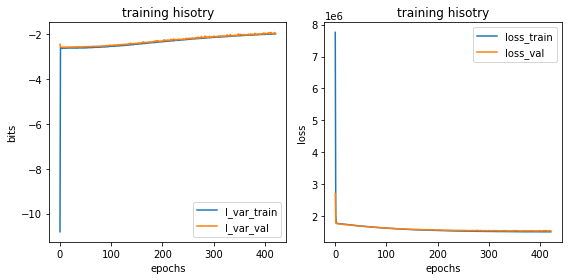

In [26]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values


I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, axs = plt.subplots(1,2,figsize=[8,4])

ax = axs[0]
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
#ax.set_xscale('log')
ax.set_title('training hisotry')

ax = axs[1]
ax.plot(model.history['loss'], label='loss_train')
ax.plot(model.history['val_loss'], label='loss_val')
# ax.set_xlim(100,300)
# ax.set_ylim(0.7*1e6,0.8*1e6)
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_title('training hisotry')
fig.tight_layout()

In [27]:
model.history['loss'][-1]/1e6

1.501882375

In [28]:
phi = gpmap.x_to_phi(x_test)
theta = np.squeeze(gpmap.weights[1].numpy())


In [29]:
theta

array([[ 0.26276   , -0.00825441, -0.1736651 , ..., -0.00776382,
         0.11311344, -0.10884791],
       [ 0.02331048,  0.10769298,  0.28078824, ...,  0.23061508,
         0.06236177,  0.01090511],
       [-0.05334591, -0.46444994, -0.00276041, ..., -0.04949091,
        -0.23433487, -0.13007116],
       ...,
       [ 0.01981486, -0.19933832, -0.0847763 , ..., -0.13198452,
         0.16242325, -0.20634273],
       [-0.24488564,  0.1580518 ,  0.11438444, ..., -0.1236103 ,
         0.0300976 ,  0.15022913],
       [ 0.51919   ,  0.42325604,  0.41742563, ..., -0.10323428,
         0.33461374,  0.57249707]], dtype=float32)

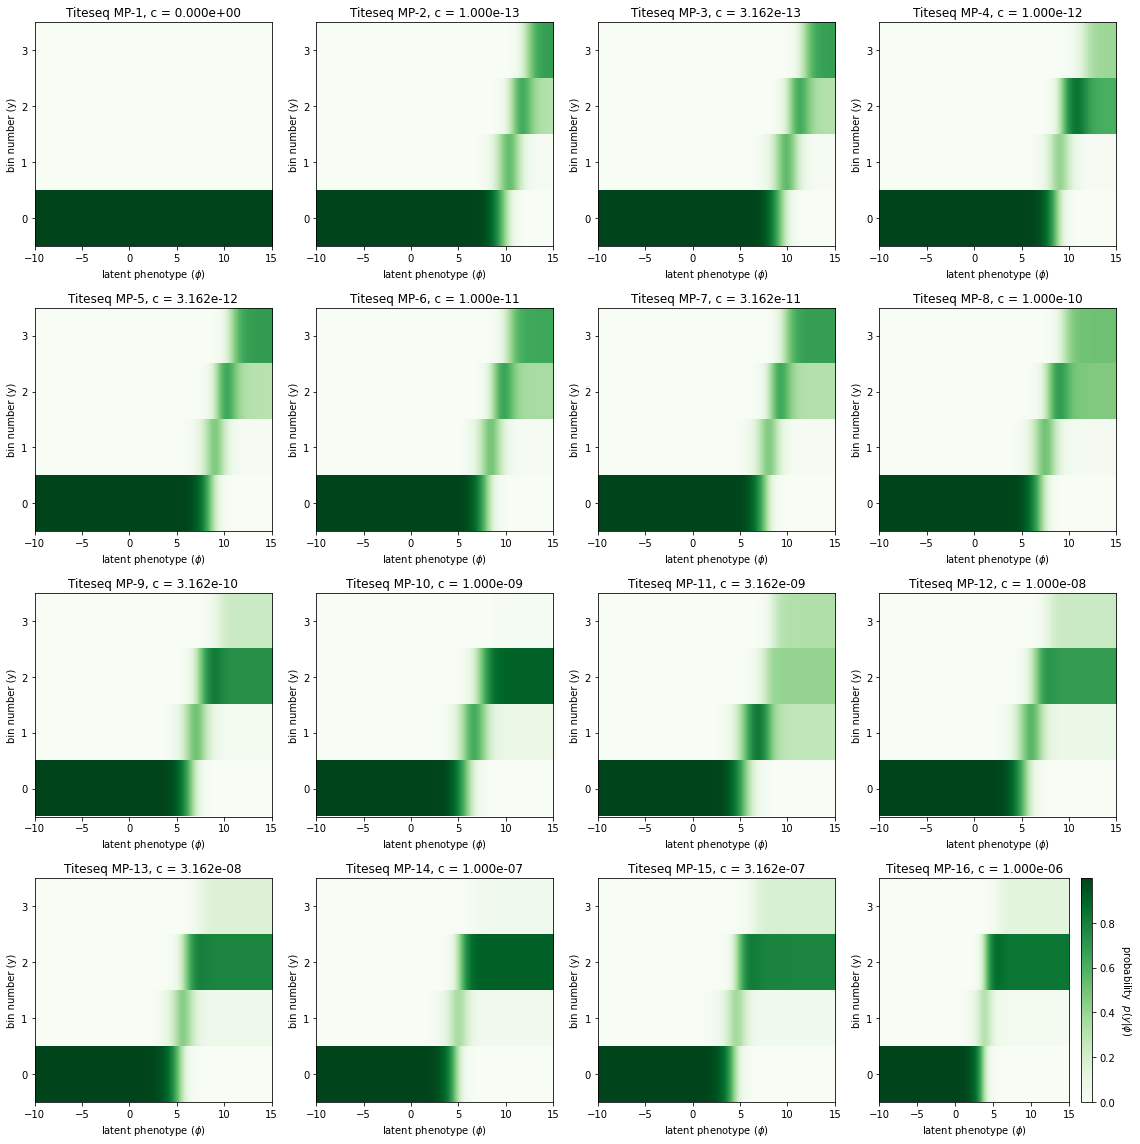

In [30]:
# Get G-P map parameters in matrix form


# Create grid in phi space
phi_lim = [-10, 15]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = mp_list[0].Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values



# Create figure with two panels
fig, axs = plt.subplots(4,4,figsize=[16,16])

mp_counter = 0
for i in range(4):
    for j in range(4):
        
        measurement_process = mp_list[mp_counter].p_of_y_given_phi(y_all, phi_grid)
        # Right panel: draw measurement process as heatmap
        ax = axs[i,j]

        im = ax.imshow(measurement_process,
                       cmap='Greens',
                       extent=phi_lim+y_lim,
                       vmin=0,
                       origin='lower',
                       interpolation='nearest',
                       aspect="auto")
        ax.set_yticks(y_all)
        ax.set_ylabel('bin number (y)')
        ax.set_xlabel('latent phenotype ($\phi$)')
        ax.set_title(f'Titeseq MP-{mp_counter+1}, c = {cs[mp_counter]:.3e}')
        mp_counter+=1
        
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")
fig.tight_layout()

#fig.savefig(f'ace2rbd_Titeseq_measurment_prcoess_mu_pos_{(mu_pos):.3f}.png',dpi=300,bbox_inches='tight')


In [31]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')

bloom_bind_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    #temp_df['bind_lib1']
    #expr_lib1
    bloom_bind_df.loc[site-1] = temp_df['bind_avg'].values[0:20]

bloom_bind_df.head()


,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-0.03,-0.09,0.03,0.00,-0.10,-0.04,-0.02,-0.07,-0.01,-0.05,-0.02,0.00,-0.03,0.01,-0.02,-0.03,0.06,-0.04,-0.16,-0.06
1,0.00,-0.09,-0.02,0.08,-0.22,-0.08,0.04,0.00,-0.05,0.00,0.00,0.00,0.06,-0.02,0.00,-0.04,-0.03,0.00,-0.03,-0.03
2,-0.01,-0.14,-0.01,-0.15,-0.15,-0.07,-0.07,-0.06,-0.01,-0.01,-0.02,-0.06,0.03,0.02,0.00,-0.08,0.00,-0.05,-0.21,-0.07
3,-0.03,-0.11,0.07,0.01,-0.22,-0.03,-0.02,-0.20,-0.03,-0.20,-0.05,0.00,-0.18,0.01,0.00,-0.06,-0.04,-0.07,-0.24,-0.09
4,0.04,-0.11,0.00,0.06,-0.03,-0.08,-0.03,-0.02,-0.03,0.00,0.01,0.03,0.06,-0.02,-0.01,0.01,0.02,-0.08,-0.05,-0.02


In [32]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')
bloom_exp_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    temp_df['expr_lib1']
    bloom_exp_df.loc[site-1] = temp_df['expr_avg'].values[0:20]
    
bloom_exp_df.head()    

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-0.11,-1.26,-0.44,-0.31,-0.70,-0.25,-0.61,-0.85,-0.20,-0.75,-0.75,0.00,-0.21,-0.53,-0.44,-0.33,-0.34,-0.61,-1.12,-1.02
1,0.00,-0.12,0.03,0.01,-0.10,0.14,0.05,0.00,-0.06,-0.03,-0.02,0.05,-0.17,0.07,-0.04,-0.03,-0.04,0.02,-0.33,-0.07
2,-0.37,-0.93,-0.27,-0.31,-0.89,-0.41,-0.29,-1.03,-0.20,-0.55,-0.47,-0.35,-0.28,-0.35,-0.54,-0.04,0.00,-0.56,-0.63,-0.62
3,-0.12,-0.57,-0.04,-0.05,-0.97,-0.21,-0.12,-0.67,-0.02,-0.72,-0.40,0.00,-0.55,-0.08,-0.12,-0.19,-0.02,-0.47,-1.01,-0.61
4,-0.01,-0.38,-0.09,0.11,-0.16,-0.16,-0.10,-0.16,0.02,0.00,-0.15,-0.08,0.09,-0.05,-0.14,-0.08,-0.08,-0.10,-0.13,-0.12


In [33]:
theta_df = pd.DataFrame(theta,columns=alphabet)

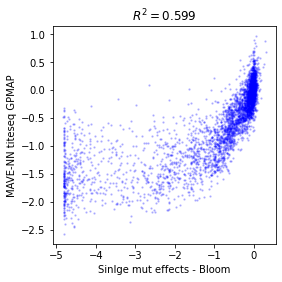

In [34]:
fig, axs = plt.subplots(1,1,figsize=[4,4])

# Left panel: draw logo using logomaker
ax = axs
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.fillna(0).values,theta_df.fillna(0).values,s=2,alpha=0.2,color='blue')
ax.set_xlabel('Sinlge mut effects - Bloom')
ax.set_ylabel('MAVE-NN titeseq GPMAP')
ax.set_title(f'$R^2 = {Rsq:.3f}$')
# ax.set_xticks(np.arange(0,201,5))
# ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
plt.show()

In [35]:
theta_lc = gpmap.get_theta(model,gauge='consensus')['theta_lc']
theta_lc_consensus_df = pd.DataFrame(theta_lc,columns=alphabet)

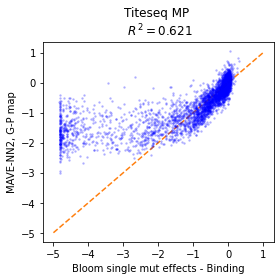

In [36]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_bind_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
plt.plot(lims,lims,'--',color='C1',zorder=-1)
plt.xlabel('Bloom single mut effects - Binding')
plt.title(f'Titeseq MP \n $R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
#plt.savefig('mavenn_bloom_binding_comparison.png',dpi=200,bbox_inches='tight')

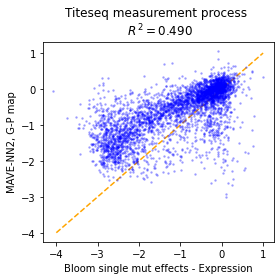

In [37]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_exp_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_exp_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.25,color='blue')

lims = [-4,1]
plt.plot(lims,lims,'--',color='orange',zorder=-1)
plt.xlabel('Bloom single mut effects - Expression')
plt.title(f'Titeseq measurement process \n $R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
#plt.savefig('mavenn_bloom_expression_comparison.png',dpi=200,bbox_inches='tight')

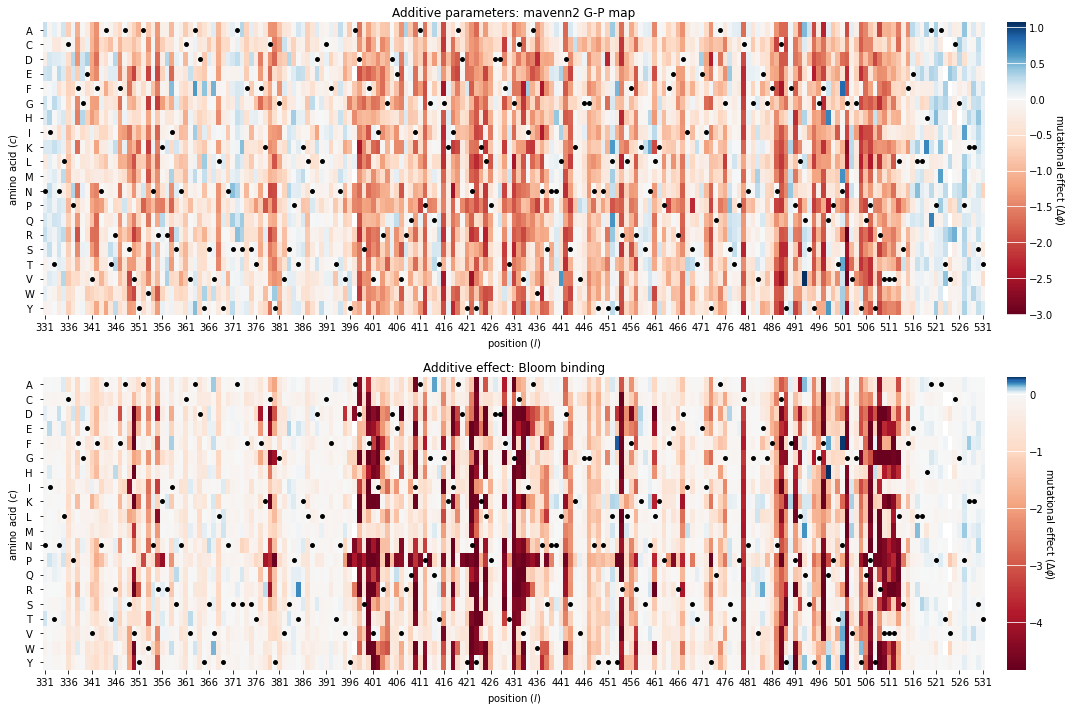

In [38]:

# Create figure
fig, axs = plt.subplots(2,1, figsize=(15,10))

# Draw heatmap
ax = axs[0]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=theta_lc_consensus_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                cmap_size='2%',
                                #clim = [-5,0.5],
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive parameters: mavenn2 G-P map')
heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
#fig.tight_layout(w_pad=5)
#fig.savefig('ace2rbd_g-p_map_mpa_sortseq_only_heatmap.png',dpi=300,bbox_inches='tight')

bloom_exp_df
# Create figure
#fig, ax = plt.subplots(1,1, figsize=(15,5))

# Draw heatmap
ax = axs[1]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=bloom_bind_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                #clim = [-5,0.5],
                                cmap_size='2%',
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive effect: Bloom binding')

heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)
#fig.savefig('ace2rbd_g-p_map_titeseq_heatmap_comparisons.png',dpi=300,bbox_inches='tight')

In [39]:
theta_lc_consensus_dm_df = pd.read_csv('discrete_monotonic_ace2rbd_binding.csv')
theta_lc_consensus_da_df = pd.read_csv('discrete_agnostic_ace2rbd_binding.csv')

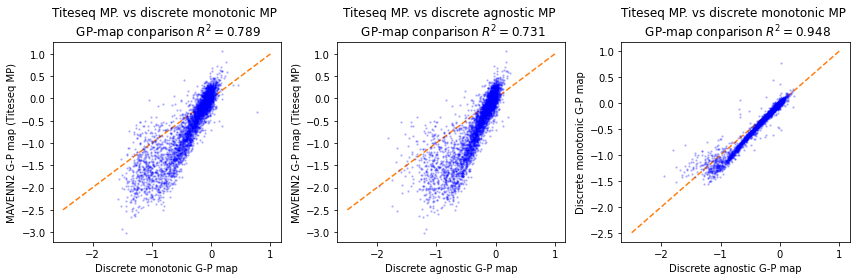

In [40]:
fig, axs = plt.subplots(1,3,figsize=(12,4))

ax = axs[0]
Rsq = np.corrcoef(theta_lc_consensus_dm_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(theta_lc_consensus_dm_df.values, theta_lc_consensus_df.values,s=2,alpha=0.2,color='blue')

lims = [-2.5,1]
ax.plot(lims,lims,'--',color='C1',zorder=-1)
ax.set_xlabel('Discrete monotonic G-P map')
ax.set_title(f'Titeseq MP. vs discrete monotonic MP \n GP-map conparison $R^2 = {Rsq:.3f}$')
ax.set_ylabel('MAVENN2 G-P map (Titeseq MP)')


ax = axs[1]
Rsq = np.corrcoef(theta_lc_consensus_da_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(theta_lc_consensus_da_df.values, theta_lc_consensus_df.values,s=2,alpha=0.2,color='blue')

lims = [-2.5,1]
ax.plot(lims,lims,'--',color='C1',zorder=-1)
ax.set_xlabel('Discrete agnostic G-P map')
ax.set_title(f'Titeseq MP. vs discrete agnostic MP \n GP-map conparison $R^2 = {Rsq:.3f}$')
ax.set_ylabel('MAVENN2 G-P map (Titeseq MP)')
fig.tight_layout()


ax = axs[2]
Rsq = np.corrcoef(theta_lc_consensus_da_df.fillna(0).values.ravel(), theta_lc_consensus_dm_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(theta_lc_consensus_da_df.values, theta_lc_consensus_dm_df.values,s=2,alpha=0.2,color='blue')

lims = [-2.5,1]
ax.plot(lims,lims,'--',color='C1',zorder=-1)
ax.set_xlabel('Discrete agnostic G-P map')
ax.set_title(f'Titeseq MP. vs discrete monotonic MP \n GP-map conparison $R^2 = {Rsq:.3f}$')
ax.set_ylabel('Discrete monotonic G-P map')
fig.tight_layout()
plt.savefig('Titeseq_discrete_monotonic_agnostic_binding_comparison.png',dpi=200,bbox_inches='tight')

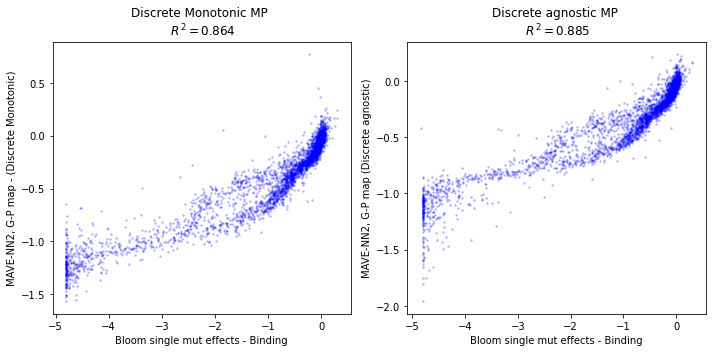

In [41]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

ax = axs[0]
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_dm_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.values, theta_lc_consensus_dm_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
ax.set_xlabel('Bloom single mut effects - Binding')
ax.set_title(f'Discrete Monotonic MP \n $R^2 = {Rsq:.3f}$')
ax.set_ylabel('MAVE-NN2, G-P map - (Discrete Monotonic)')



ax = axs[1]
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_da_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.values, theta_lc_consensus_da_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
ax.set_xlabel('Bloom single mut effects - Binding')
ax.set_title(f'Discrete agnostic MP \n $R^2 = {Rsq:.3f}$')
ax.set_ylabel('MAVE-NN2, G-P map (Discrete agnostic)')


fig.tight_layout()
#plt.savefig('mavenn_bloom_binding_comparison.png',dpi=200,bbox_inches='tight')

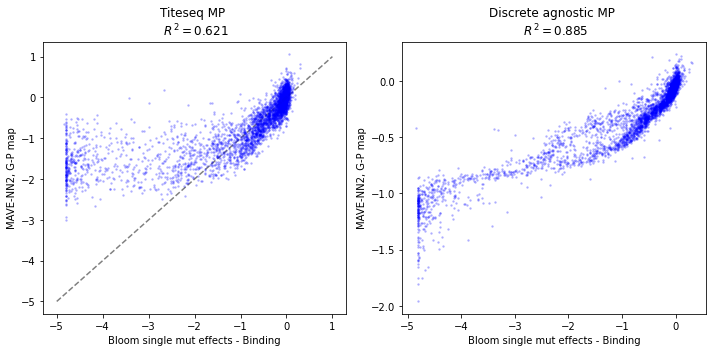

In [42]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

ax = axs[0]
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
ax.plot(lims,lims,'--',color='gray',zorder=-1)
ax.set_xlabel('Bloom single mut effects - Binding')
ax.set_title(f'Titeseq MP \n $R^2 = {Rsq:.3f}$')
ax.set_ylabel('MAVE-NN2, G-P map')



ax = axs[1]
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_da_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.values, theta_lc_consensus_da_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
ax.set_xlabel('Bloom single mut effects - Binding')
ax.set_title(f'Discrete agnostic MP \n $R^2 = {Rsq:.3f}$')
ax.set_ylabel('MAVE-NN2, G-P map')


fig.tight_layout()
#plt.savefig('mavenn_bloom_binding_comparison.png',dpi=200,bbox_inches='tight')

Get titration curves

In [43]:
# #phi = gpmap.x_to_phi(x_test)

# #a = mp_list[0].get_weights()[0][0]

# def mu_of_phi(c, 
#               a=a,
#               phi=phi,
#               mu_neg=mu_neg):

#     K_a_of_phi = 10**(phi)
#     B = 10**(mu_neg)
#     A = 10**(a)
    
#     mu_of_phi = np.log10(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
#     return mu_of_phi


In [44]:
# plt.figure(figsize=(5,5))

# #cs_ = np.arange(0.01,30,0.01)
# cs_bloom = np.arange(10**(-13),10**(-3),10**(-6))

# for _ in np.random.choice(np.arange(0,len(phi)),size=10):
#     plt.plot(cs_bloom,mu_of_phi(c=10**(cs_bloom),phi=phi[_]),'o-')
#     #plt.plot(cs_bloom,mu_of_phi(c=cs_bloom,phi=phi[_]),'o-')
    
    
# plt.xlabel('log concentration - grid (inferred)',fontsize=12)
# #plt.xscale('log')
# #plt.yscale('log')
# plt.ylabel('$\mu(\phi)$',fontsize=15)
# #plt.ylim(0,4)

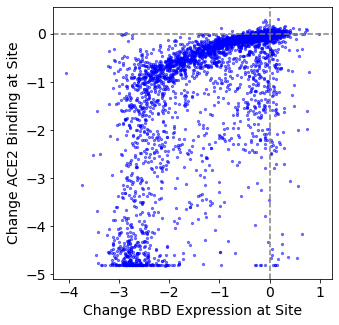

In [45]:
plt.figure(figsize=(5,5))
plt.scatter(bloom_exp_df.values.ravel(),bloom_bind_df.values.ravel(), color='blue',s=5,alpha=0.5)
plt.xlabel('Change RBD Expression at Site',fontsize=14)
plt.ylabel('Change ACE2 Binding at Site',fontsize=14)
plt.axvline(0,ls='--',color='gray')
plt.axhline(0,ls='--',color='gray')
plt.tick_params(labelsize=14)
plt.savefig('Bloom_binding_vs_expression.png',dpi=200,bbox_inches='tight')

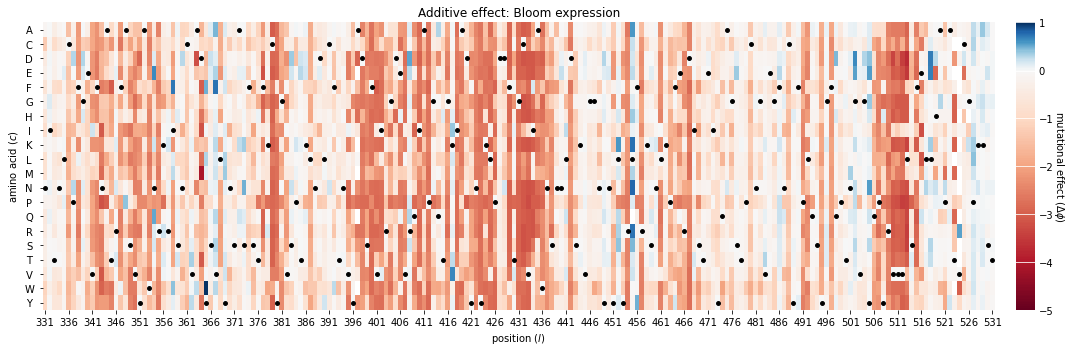

In [46]:

# Create figure
fig, ax = plt.subplots(1,1, figsize=(15,5))


heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=bloom_exp_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                clim = [-5,1],
                                cmap_size='2%',
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive effect: Bloom expression')

heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)
fig.savefig('ace2rbd_g-p_map_heatmap_bloom_expression.png',dpi=300,bbox_inches='tight')

### Compute $K_d$ values

In [47]:
#phi = gpmap.x_to_phi(x_test)

#a = mp_list[0].get_weights()[0][0]

def mu_of_phi(c, 
              a=None,
              phi=phi,
              mu_neg=mu_neg):

    K_a_of_phi = 10**(phi)
    B = 10**(mu_neg)
    A = 10**(a)
    
    mu_of_phi = np.log10(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
    return mu_of_phi


In [48]:
mu_pos,mu_neg

(11, 1)

In [49]:
# as_list = []
# for idx, layer in enumerate(model.model.layers[35:]):
#     as_list.append(layer.get_weights()[0][0])
    
# fig, ax = plt.subplots(figsize=(5,4))
# ax.plot(as_list,'ro-')
# ax.set_xlabel('Measurement process id')
# ax.set_ylabel('Inferred $a$ (for each MP)')
# ax.set_xticks(np.arange(0,16))
# ax.set_xticklabels(np.arange(1,16+1))
# ax.axhline(np.mean(as_list))

In [50]:
def _x_to_mat(x, alphabet):
    return (np.array(list(x))[:, np.newaxis] == alphabet[np.newaxis, :]).astype(float)

In [51]:
WT_seq = model.x_stats['consensus_seq']

single_mutants = []

for idx,WT_char in enumerate(WT_seq):
    #print(idx)
    for mutant in model.alphabet:
#         if mutant==WT_seq[idx]:
#             continue
#         else:
        temp_WT_list = list(WT_seq)
        temp_WT_list[idx] = mutant
        single_mutant = ''.join(temp_WT_list)
        single_mutants.append(single_mutant)
            

In [52]:
phi_single_mutants = gpmap.x_to_phi(single_mutants)

In [53]:
mavenn2_Kd = pd.DataFrame(1/(10**phi_single_mutants.reshape(201,20)),columns=model.alphabet)

In [54]:
# fig, axs = plt.subplots(1,2,figsize=(10,5))


# #lims=[10**-12,10**-1]
# #ax.plot(lims,lims,'--',color='orange')

# #Rsq = np.corrcoef(10**bloom_bind_df.values.ravel(),10**(phi_single_mutants))[0,1]**2
# ax = axs[0]
# #ax.set_title(f'$R^2$ = {Rsq:.3f}')
# ax.scatter(10**bloom_bind_df.values.ravel(),
#            10**(phi_single_mutants),
#             color='blue',s=5,alpha=0.25)
# ax.set_xscale('log')
# ax.set_yscale('log')

# ax.set_xlabel('$K_d$ (Starr et al)',fontsize=14)
# ax.set_ylabel('$K_d$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)


# ax = axs[1]
# #ax.set_title(f'$R^2$ = {Rsq:.3f}')
# ax.scatter(10**bloom_exp_df.values.ravel(),
#            10**(phi_single_mutants),
#             color='blue',s=5,alpha=0.25)
# ax.set_xscale('log')
# ax.set_yscale('log')

# ax.set_xlabel('Expression (Starr et al)',fontsize=14)
# ax.set_ylabel('$K_d$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)

# # ax.set_xlim(lims)
# # ax.set_ylim(lims)
# fig.tight_layout()

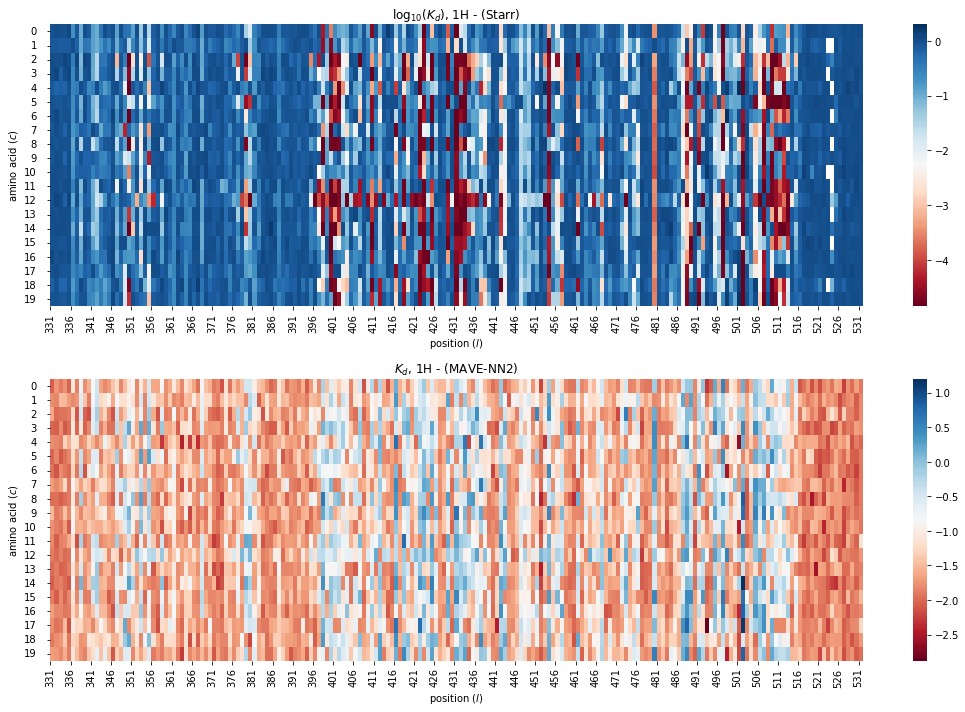

In [55]:
fig, axs = plt.subplots(2,1,figsize=(15,10))
from matplotlib.colors import LogNorm

from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vmin=-10**-9, vcenter=10**-6.5, vmax=10**-5)
#pcolormesh(your_data, cmap="coolwarm", norm=divnorm)

data = (bloom_bind_df.values.ravel())
log_norm = LogNorm(vmin=min(data), vmax=max(data))
ax = axs[0]
sns.heatmap((bloom_bind_df.values.T),
            ax=ax,
            cmap='RdBu',
            #norm=log_norm
            #norm=divnorm
            #norm=norm
           )

ax.set_xticks(np.arange(0,201,5))
ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
ax.tick_params(axis='y', which='major', pad=10)
ax.set_xlabel('position ($l$)')
ax.set_ylabel('amino acid ($c$)')
ax.set_title(f'$\log_{{10}}(K_d)$, 1H - (Starr)')
#ax.set_yticklabels(Adams_ordering,rotation=0)



ax = axs[1]
data = np.log10(mavenn2_Kd.values.ravel())
log_norm = LogNorm(vmin=min(data), vmax=max(data))

sns.heatmap(np.log10(mavenn2_Kd.values.T)+7,
            ax=ax,
            cmap='RdBu',
            #norm=log_norm
            #norm=divnorm
            #norm=norm
           )

ax.set_xticks(np.arange(0,201,5))
ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
ax.tick_params(axis='y', which='major', pad=10)
ax.set_xlabel('position ($l$)')
ax.set_ylabel('amino acid ($c$)')
ax.set_title(f'$K_d$, 1H - (MAVE-NN2)')
#ax.set_yticklabels(Adams_ordering,rotation=0)

fig.tight_layout()
# fig.savefig('pngs/Titeseq_MP/Adams_Kd_vs_Mavenn2_Kd_heatmaps.png',
#             facecolor='white', edgecolor='none',
#             dpi=200,bbox_inches='tight')


Text(0.5, 0, '$(K_d)$, MAVE-NN, ${{\\rm exp}_{10}(\\phi)}^{-1}$')

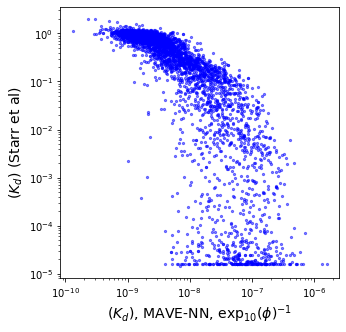

In [56]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(mavenn2_Kd.values.ravel(),10**bloom_bind_df.values.ravel()
            ,s=5,alpha=0.5,color='blue')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylabel('$\log_{10}(K_d)$ (Starr et al)',fontsize=14)
# ax.set_xlabel('$\log_{10}(K_d)$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)

ax.set_ylabel('$(K_d)$ (Starr et al)',fontsize=14)
ax.set_xlabel('$(K_d)$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)

In [57]:
# fig, ax = plt.subplots(figsize=(5,5))


# # lims=[10**-12,10**-1]
# # ax.plot(lims,lims,'--',color='orange',lw=2)

# Rsq = np.corrcoef(1/(10**((phi_single_mutants))),
#             10**(bloom_bind_df.values.ravel()))[0,1]**2

# #ax.set_title(f'$R^2$ = {Rsq:.3f}')
# ax.scatter(np.log10(1/10**((phi_single_mutants))),
#            (bloom_bind_df.values.ravel()),
#             color='blue',s=5,alpha=0.25)
# #ax.set_xscale('log')
# #ax.set_yscale('log')

# ax.set_ylabel('$K_d$ (Starr et al)',fontsize=14)
# ax.set_xlabel('$K_d$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)
# # ax.set_xlim(lims)
# # ax.set_ylim(lims)
# fig.tight_layout()
# # fig.savefig('pngs/__/__.png',
# #             facecolor='white', edgecolor='none',
# #             dpi=200,bbox_inches='tight')


In [58]:
#a = np.mean(as_list)

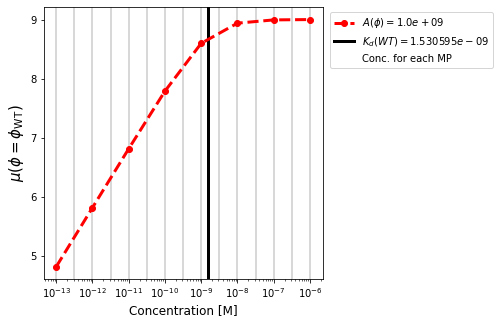

In [59]:
fig, ax = plt.subplots(figsize=(5,5))

phi_WT = gpmap.x_to_phi(WT_seq)
cs_ = np.arange(10**-13,10**-7,10**(-11))
cs_course = np.arange(10**-12,10**-1,10**(-7))
cs_fig_1  = np.array([10**(-13),10**(-12),10**(-11),10**(-10),10**(-9),10**(-8),10**(-7),10**(-6)])

#for a in as_list:
#ax.plot(cs_course,(mu_of_phi(c=cs_course,a=a,phi=phi_WT)),lw=3,zorder=10,label=f'$A(\phi) = {(10**a):.1e}$')    
ax.plot(cs_fig_1,(mu_of_phi(c=cs_fig_1,a=a,phi=phi_WT)),'ro--',lw=3,zorder=10,label=f'$A(\phi) = {(10**a):.1e}$')    

ax.set_xlabel('Concentration [M]',fontsize=12)
ax.set_ylabel('$\mu(\phi = \phi_{\\rm WT})$',fontsize=15)

Kd_WT = 1/(10**phi_WT)
ax.axvline(Kd_WT,color='black',lw=3,label=f'$K_d (WT) = {(Kd_WT):2e}$')
for c in cs:    
    ax.axvline(c,c='gray',zorder=-10,alpha=0.4)
    
ax.axvline(c,c='gray',label=f'Conc. for each MP',zorder=-10,alpha=0.0)    

leg = ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
for lh in leg.legendHandles: 
    lh.set_alpha(1)


ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_xlim(10**-14,)    
#ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

#fig.savefig(f'pngs/mu_phi_WT_vs_conc_{mu_pos}_{mu_neg}_{sigma_pos}.png',dpi=300,bbox_inches='tight')


In [60]:
N13F = 'NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST'
phi_N13F = gpmap.x_to_phi(N13F)


In [61]:
S184H = model.x_consensus
S184H = list(S184H)
S184H[184-1] = 'H'
S184H = ''.join(S184H)
phi_S184H = gpmap.x_to_phi(S184H)

In [109]:
data_df

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,1,...,0,0,21,0,0,0,17,0,0,0
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,6,35,162,4,24,85,80,30,10,...,37,0,151,4,0,0,154,19,0,0
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,1,3,439,1,0,14,307,17,...,82,0,180,12,0,12,306,20,0,0
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,3,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184245,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,239,0,0,1,167,0,...,0,0,246,5,0,0,183,26,0,0
184246,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,29,211,45,0,44,244,19,1,...,1,1,147,10,0,0,210,30,0,0
184247,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,24,394,13,0,28,389,2,0,...,0,0,388,27,0,0,366,40,0,0
184248,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,49,17,1,0,19,4,0,5,41,...,0,0,88,19,0,0,119,5,0,0


In [62]:
WT_data_df = data_df[data_df['x']==model.x_consensus].reset_index(drop=True).copy()

In [110]:
WT_data_df

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,14,0,...,0,1,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1597,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1598,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,18,0,0,5,22,0,...,0,0,4,0,0,0,4,7,0,0
1599,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
N13F_data_df = data_df[data_df['x']==N13F].reset_index(drop=True).copy()
S184H_data_df = data_df[data_df['x']==S184H].reset_index(drop=True).copy()

In [64]:
y_WT = WT_data_df[y_cols]
y_N13F = N13F_data_df[y_cols]
y_S184H = S184H_data_df[y_cols]

In [103]:
y_WT[y_cols]

,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,TiteSeq_03_bin2,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,0,0,0,0,0,0,0,14,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1597,0,0,0,21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1598,0,0,0,18,0,0,5,22,0,0,...,0,0,4,0,0,0,4,7,0,0
1599,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
df_conc

,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1596,0,0,0,0
1597,0,0,0,0
1598,4,7,0,0
1599,0,0,0,0


In [118]:
df_conc.sum(axis=0)

TiteSeq_16_bin1    6176
TiteSeq_16_bin2     456
TiteSeq_16_bin3    2217
TiteSeq_16_bin4     240
dtype: int64

In [116]:
mean_bin_list = []
for idx,conc_index in enumerate(np.arange(1,16+1,1)):
    
    # this is a concentration string to specific numbers of cells sorted in each 
    # of the 4 bins at a particular concentrations
    conc_string = f"{conc_index:02d}"
    
    df_conc = y_WT[[f'TiteSeq_{conc_string}_bin1',
    #df_conc = y[[f'TiteSeq_{conc_string}_bin1',
                 f'TiteSeq_{conc_string}_bin2',
                 f'TiteSeq_{conc_string}_bin3',
                 f'TiteSeq_{conc_string}_bin4']]
    
    # compute n across the 4 bins for a given concentration of ACE2
    n = df_conc.sum(axis=0)
    
    mean_bin = sum([i*n_i for i,n_i in enumerate(n,start=1)])/sum([n_i for n_i in n])
    
    if conc_index == 1:
        #print(mean_bin)
        A = 10**mean_bin
    elif conc_index == 16:
        #print(mean_bin) 
        B = 10**mean_bin
    
    #print(cs[idx],conc_index,mean_bin)
    mean_bin_list.append(mean_bin)

In [119]:
mean_bin_list

[3.27544038433542,
 3.243331164606376,
 3.1963754778422766,
 3.119354489331745,
 3.145124716553288,
 2.940441073184436,
 3.120270430553908,
 2.7135409521196325,
 2.3502495840266224,
 1.838311935934918,
 1.436131138620596,
 1.674943761896522,
 1.2838890240934533,
 1.357424626655396,
 1.3413767760901518,
 1.6172296182198262]

In [67]:
mean_bin_list_N13F = []
for idx,conc_index in enumerate(np.arange(1,16+1,1)):
    
    # this is a concentration string to specific numbers of cells sorted in each 
    # of the 4 bins at a particular concentrations
    conc_string = f"{conc_index:02d}"
    
    df_conc = y_N13F[[f'TiteSeq_{conc_string}_bin1',
    #df_conc = y[[f'TiteSeq_{conc_string}_bin1',
                 f'TiteSeq_{conc_string}_bin2',
                 f'TiteSeq_{conc_string}_bin3',
                 f'TiteSeq_{conc_string}_bin4']]
    
    # compute n across the 4 bins for a given concentration of ACE2
    n = df_conc.sum(axis=0)
    
    mean_bin_N13F = sum([i*n_i for i,n_i in enumerate(n,start=1)])/sum([n_i for n_i in n])
    
    if conc_index == 1:
        #print(mean_bin)
        A_N13F = 10**mean_bin_N13F
    elif conc_index == 16:
        #print(mean_bin) 
        B_N13F = 10**mean_bin_N13F
    
    #print(cs[idx],conc_index,mean_bin)
    mean_bin_list_N13F.append(mean_bin_N13F)

In [68]:
mean_bin_list_S184H = []
for idx,conc_index in enumerate(np.arange(1,16+1,1)):
    
    # this is a concentration string to specific numbers of cells sorted in each 
    # of the 4 bins at a particular concentrations
    conc_string = f"{conc_index:02d}"
    
    df_conc = y_S184H[[f'TiteSeq_{conc_string}_bin1',
    #df_conc = y[[f'TiteSeq_{conc_string}_bin1',
                 f'TiteSeq_{conc_string}_bin2',
                 f'TiteSeq_{conc_string}_bin3',
                 f'TiteSeq_{conc_string}_bin4']]
    
    # compute n across the 4 bins for a given concentration of ACE2
    n = df_conc.sum(axis=0)
    
    mean_bin_S184H = sum([i*n_i for i,n_i in enumerate(n,start=1)])/sum([n_i for n_i in n])
    
    if conc_index == 1:
        #print(mean_bin)
        A_S184H = 10**mean_bin_S184H
    elif conc_index == 16:
        #print(mean_bin) 
        B_S184H = 10**mean_bin_S184H
    
    #print(cs[idx],conc_index,mean_bin)
    mean_bin_list_S184H.append(mean_bin_S184H)

Text(0, 0.5, '$\\overline{bin_{ACE2}}$')

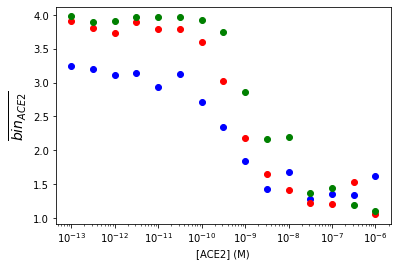

In [69]:
#mean_bin_list
plt.plot(cs, mean_bin_list,'bo')
plt.plot(cs, mean_bin_list_N13F,'ro')
plt.plot(cs, mean_bin_list_S184H,'go')
plt.xscale('log')
plt.xlabel('[ACE2] (M)')
plt.ylabel('$\overline{bin_{ACE2}}$',fontsize=14)

In [70]:

def mean_bin_mavenn2(c, 
                     A,
                     B,
                     phi=phi):

    K_a_of_phi = 10**(phi)
    
    #mu_of_phi = np.log10((10**3.27544038433542)*(c*K_a_of_phi)/(1+c*K_a_of_phi)+(10**1.6172296182198262))
    mu_of_phi = np.log10(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
    return mu_of_phi

In [71]:
A,a,10**a

(1885.560120621889, 9, 1000000000)

In [72]:
Starr_Fig1C_panel_df = pd.read_csv('Starr_Figure_1C_panel_1_data.csv',names=['[ACE2]','rel_ACE_binding'])
Starr_Fig1C_panel_df.columns

Index(['[ACE2]', 'rel_ACE_binding'], dtype='object')

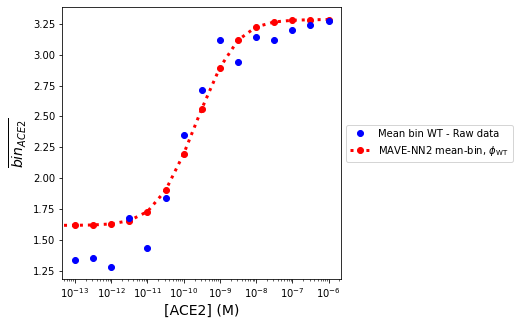

In [73]:
fig, ax = plt.subplots(1,1,figsize=(5,5))


ax.plot(np.array(cs)[::-1],mean_bin_list,'o',color='blue',label='Mean bin WT - Raw data',zorder=10)

# ax.plot(Starr_Fig1C_panel_df['[ACE2]'],Starr_Fig1C_panel_df['rel_ACE_binding'],'x',ms=7,color='black',label='Fig-1C (Sars-Cov-2), Starr et al')
ax.plot(np.array(cs)[::-1],(mean_bin_mavenn2(c=np.array(cs)[::-1],A=A,B=B,phi=phi_WT)),
        'ro:',lw=3,label='MAVE-NN2 mean-bin, $\phi_{\\rm WT}$')

#ax.axvline(3.9*10**(-11))
#ax.axvline(Kd_WT,color='black',lw=3,label=f'$K_d (WT) = {(Kd_WT):2e}$')
ax.set_xlabel('[ACE2] (M)',fontsize=14)
ax.set_ylabel('$\overline{bin_{ACE2}}$',fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
#fig.tight_layout()
#fig.savefig('Titeseq_sanity_check.png',dpi=200,bbox_inches='tight',facecolor='white', edgecolor='none')


## Make above for a bunch of variants - with a range of k_d values

In [74]:
bloom_binding_Kds_df = pd.read_csv('binding_Kds.txt')

In [75]:
data_df['x'].values[3][13-1]


'F'

In [111]:
temp_df = bloom_binding_Kds_df[(bloom_binding_Kds_df['variant_class']=='wildtype') & (bloom_binding_Kds_df['target']=='SARS-CoV-2')].reset_index(drop=True).copy()


In [115]:
temp_df

,library,target,barcode,variant_call_support,avgcount,log10Ka,delta_log10Ka,log10SE,response,baseline,nMSR,variant_class,aa_substitutions,n_aa_substitutions
0,lib1,SARS-CoV-2,AAAAAAAAGGACGGAA,9,177.75,10.72,-0.04,0.05,2.89,1.08,0.00,wildtype,NaN,0
1,lib1,SARS-CoV-2,AAAAAAATAATATACC,9,76.16,10.76,-0.01,0.05,2.94,1.03,0.00,wildtype,NaN,0
2,lib1,SARS-CoV-2,AAAAAACAACAATATC,2,22.25,10.83,0.07,0.07,2.94,1.02,0.00,wildtype,NaN,0
3,lib1,SARS-CoV-2,AAAAAACATCTGCATG,24,465.25,10.78,0.02,0.06,2.90,1.06,0.00,wildtype,NaN,0
4,lib1,SARS-CoV-2,AAAAAACGGTTGCATA,4,24.64,10.92,0.16,0.23,2.62,1.00,0.02,wildtype,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9119,lib2,SARS-CoV-2,TTTTTCACCTTGTAAC,4,30.53,10.85,0.02,0.05,2.90,1.13,0.00,wildtype,NaN,0
9120,lib2,SARS-CoV-2,TTTTTCCATGATCCTA,2,3.20,NaN,NaN,NaN,NaN,NaN,NaN,wildtype,NaN,0
9121,lib2,SARS-CoV-2,TTTTTTGGAAATGACA,5,62.74,10.82,-0.02,0.05,2.96,1.07,0.00,wildtype,NaN,0
9122,lib2,SARS-CoV-2,TTTTTTGGACGCTATA,8,143.06,10.86,0.02,0.06,2.92,1.04,0.00,wildtype,NaN,0


In [77]:
bloom_binding_Kds_df[bloom_binding_Kds_df['n_aa_substitutions']==1]

,library,target,barcode,variant_call_support,avgcount,log10Ka,delta_log10Ka,log10SE,response,baseline,nMSR,variant_class,aa_substitutions,n_aa_substitutions
3,lib1,SARS-CoV-2,AAAAAAAACAAGCAGA,6,146.32,10.35,-0.42,0.05,2.87,1.01,0.0,1 nonsynonymous,N13F,1
7,lib1,SARS-CoV-2,AAAAAAAACCCATCGT,3,1.78,NaN,NaN,NaN,NaN,NaN,NaN,1 nonsynonymous,S184H,1
9,lib1,SARS-CoV-2,AAAAAAAACGACAATA,1,2.09,NaN,NaN,NaN,NaN,NaN,NaN,1 nonsynonymous,G196Y,1
16,lib1,SARS-CoV-2,AAAAAAAAGTTATGTT,4,67.11,10.67,-0.09,0.09,2.89,1.06,0.0,1 nonsynonymous,P7S,1
29,lib1,SARS-CoV-2,AAAAAAACCTTACAAA,3,139.62,10.72,-0.05,0.05,2.90,1.03,0.0,1 nonsynonymous,P149Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195052,lib2,SARS-CoV-2,TTTTTTAATGACTTAG,8,88.30,10.63,-0.20,0.05,2.95,1.06,0.0,1 nonsynonymous,G116V,1
195055,lib2,SARS-CoV-2,TTTTTTAGACTATATG,2,124.00,10.32,-0.51,0.03,2.88,1.09,0.0,1 nonsynonymous,A67T,1
195060,lib2,SARS-CoV-2,TTTTTTATCCAAATCG,7,63.01,10.61,-0.22,0.07,2.89,1.11,0.0,1 nonsynonymous,N30R,1
195072,lib2,SARS-CoV-2,TTTTTTGCTGGCATAT,1,10.37,10.60,-0.23,0.10,2.98,1.00,0.0,1 nonsynonymous,Y91M,1


In [78]:
a_Bloom_N13F = np.mean(bloom_binding_Kds_df[bloom_binding_Kds_df['aa_substitutions']=='N13F']['response'])
b_Bloom_N13F = np.mean(bloom_binding_Kds_df[bloom_binding_Kds_df['aa_substitutions']=='N13F']['baseline'])
Kd_Bloom_N13F = 1/10**np.mean(bloom_binding_Kds_df[bloom_binding_Kds_df['aa_substitutions']=='N13F']['log10Ka'])

In [79]:
a_Bloom_S184H = np.mean(bloom_binding_Kds_df[bloom_binding_Kds_df['aa_substitutions']=='S184H']['response'])
b_Bloom_S184H = np.mean(bloom_binding_Kds_df[bloom_binding_Kds_df['aa_substitutions']=='S184H']['baseline'])
Kd_Bloom_S184H = 1/10**np.mean(bloom_binding_Kds_df[bloom_binding_Kds_df['aa_substitutions']=='S184H']['log10Ka'])

In [80]:
Kd_Bloom_N13F,a_Bloom_N13F,b_Bloom_N13F

(4.3834714451875436e-11, 2.833636363636364, 1.0609090909090912)

In [81]:
1/10**phi_N13F

2.864918766936538e-09

In [82]:
bloom_binding_Kds_df_WT = bloom_binding_Kds_df[bloom_binding_Kds_df['variant_class']=='wildtype'].copy()
bloom_binding_Kds_df_WT.head()

,library,target,barcode,variant_call_support,avgcount,log10Ka,delta_log10Ka,log10SE,response,baseline,nMSR,variant_class,aa_substitutions,n_aa_substitutions
13,lib1,SARS-CoV-2,AAAAAAAAGGACGGAA,9,177.75,10.72,-0.04,0.05,2.89,1.08,0.00,wildtype,NaN,0
57,lib1,SARS-CoV-2,AAAAAAATAATATACC,9,76.16,10.76,-0.01,0.05,2.94,1.03,0.00,wildtype,NaN,0
78,lib1,SARS-CoV-2,AAAAAACAACAATATC,2,22.25,10.83,0.07,0.07,2.94,1.02,0.00,wildtype,NaN,0
89,lib1,SARS-CoV-2,AAAAAACATCTGCATG,24,465.25,10.78,0.02,0.06,2.90,1.06,0.00,wildtype,NaN,0
109,lib1,SARS-CoV-2,AAAAAACGGTTGCATA,4,24.64,10.92,0.16,0.23,2.62,1.00,0.02,wildtype,NaN,0


In [83]:
bloom_binding_Kds_df_WT = bloom_binding_Kds_df_WT[['response','baseline','log10Ka']].reset_index(drop=True).dropna()


In [84]:
a_Bloom_mean = np.mean(bloom_binding_Kds_df_WT['response'])
b_Bloom_mean = np.mean(bloom_binding_Kds_df_WT['baseline'])
Kd_Bloom_mean = 1/10**np.mean(bloom_binding_Kds_df_WT['log10Ka'])

In [85]:
bloom_binding_Kds_df_WT_ss = bloom_binding_Kds_df_WT.sample(frac=0.1)

In [86]:
bloom_binding_Kds_df_WT_ss

,response,baseline,log10Ka
6392,2.79,1.23,10.80
7888,2.97,1.05,10.78
6597,2.92,1.09,10.74
7827,2.95,1.06,10.89
4186,2.03,1.22,10.59
...,...,...,...
5534,2.88,1.12,10.84
8836,2.80,1.07,10.72
5619,2.99,1.01,10.79
2814,2.88,1.07,10.66


In [87]:
response = bloom_binding_Kds_df_WT_ss['response']
baseline = bloom_binding_Kds_df_WT_ss['baseline']
log10Ka = bloom_binding_Kds_df_WT_ss['log10Ka']

In [88]:
a_Bloom = np.mean(response)
b_Bloom = np.mean(baseline)
kD_WT_Bloom = np.mean(1/10**log10Ka)

In [89]:
a_Bloom,b_Bloom,kD_WT_Bloom

(2.9031206496519726, 1.072134570765661, 1.7651780162375908e-11)

In [90]:
def mean_bin_Bloom(cs, a_Bloom, b_Bloom, kD_WT_Bloom):
    return (a_Bloom * cs)/(cs+kD_WT_Bloom) +b_Bloom

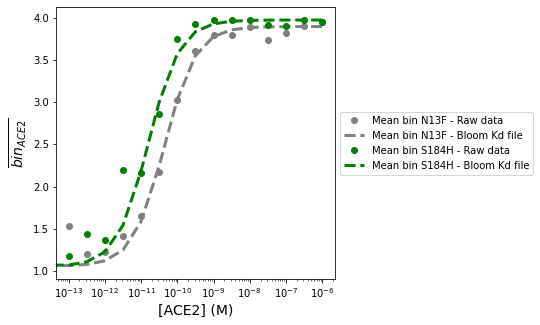

In [91]:
fig, ax = plt.subplots(1,1,figsize=(5,5))


ax.plot(np.array(cs)[::-1],mean_bin_list_N13F,'o',color='gray',label='Mean bin N13F - Raw data')
ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1],a_Bloom_N13F, b_Bloom_N13F, Kd_Bloom_N13F),'--',lw=3,color='gray',label='Mean bin N13F - Bloom Kd file')


ax.plot(np.array(cs)[::-1],mean_bin_list_S184H,'o',color='green',label='Mean bin S184H - Raw data')
ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1],a_Bloom_S184H, b_Bloom_S184H, Kd_Bloom_S184H),'--',lw=3,color='green',label='Mean bin S184H - Bloom Kd file')

# ax.plot(np.array(cs)[::-1],(mean_bin_mavenn2(c=np.array(cs)[::-1],phi=phi_WT)),
#         'ro-',lw=3,label='MAVE-NN2 mean-bin, $\phi_{\\rm WT}$')

# ax.plot(np.array(cs)[::-1],(mean_bin_mavenn2(c=np.array(cs)[::-1],phi=phi_N13F)),
#         'ro--',lw=3,label='MAVE-NN2 mean-bin, $\phi_{\\rm N13F}$')




#ax.axvline(3.9*10**(-11))
#ax.axvline(Kd_WT,color='black',lw=3,label=f'$K_d (WT) = {(Kd_WT):2e}$')
ax.set_xlabel('[ACE2] (M)',fontsize=14)
ax.set_ylabel('$\overline{bin_{ACE2}}$',fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
#fig.tight_layout()
#fig.savefig('Titeseq_sanity_check.png',dpi=200,bbox_inches='tight',facecolor='white', edgecolor='none')


In [92]:
A_N13F,A_S184H

(8985.745613405184, 8870.1962253467)

In [93]:
B

41.421862073563226

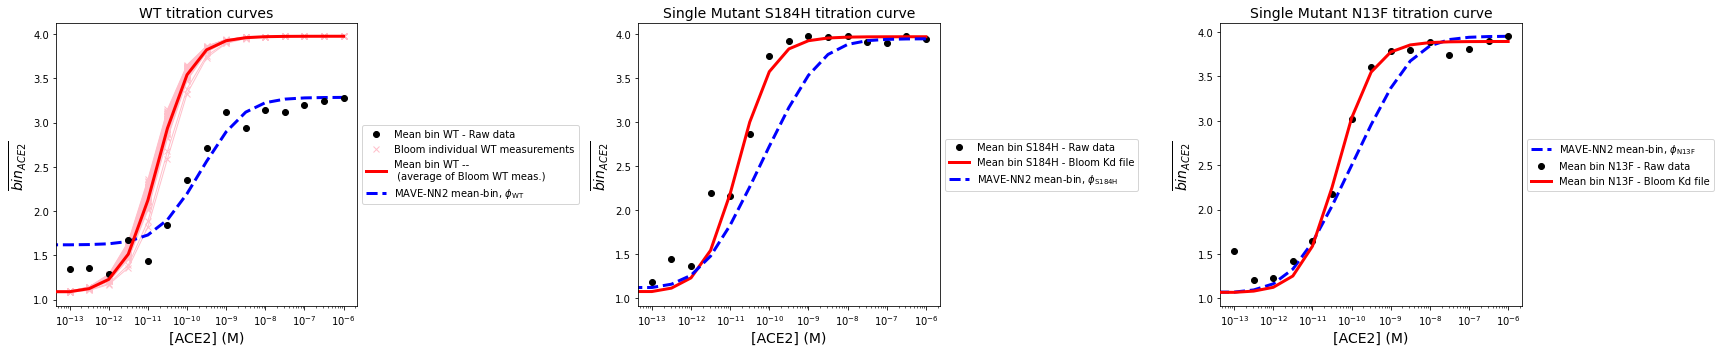

In [94]:
fig, axs = plt.subplots(1,3,figsize=(24,5))


ax = axs[0]
ax.plot(np.array(cs)[::-1],mean_bin_list,'o',color='black',label='Mean bin WT - Raw data',zorder=20)

counter = 0
for a_bloom, b_bloom, kD_WT_Bloom in zip(response, baseline, 1/10**log10Ka):
    #ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1],a_Bloom, b_Bloom, kD_WT_Bloom),'x-',color='brown',label='Mean bin WT - Bloom Kd file',zorder=10)
    ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1],a_Bloom, b_Bloom, kD_WT_Bloom),'x-',color='pink',alpha=1,lw=1)
    counter +=1
    if counter == 50:
        ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1],a_Bloom, b_Bloom, kD_WT_Bloom),'x',color='pink',alpha=1,lw=1,label='Bloom individual WT measurements')
        break

ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1],np.mean(response), np.mean(baseline), np.mean(1/10**log10Ka)),'-',lw=3,color='red',label='Mean bin WT -- \n (average of Bloom WT meas.)',zorder=20)
#ax.plot(Starr_Fig1C_panel_df['[ACE2]'],Starr_Fig1C_panel_df['rel_ACE_binding'],'x-',ms=7,color='black',label='Fig-1C, recreated from Starr et al')
ax.plot(np.array(cs)[::-1],(mean_bin_mavenn2(c=np.array(cs)[::-1],A=A,B=B,phi=phi_WT)),
        '--',color='blue',lw=3,label='MAVE-NN2 mean-bin, $\phi_{\\rm WT}$')



ax.set_xlabel('[ACE2] (M)',fontsize=14)
ax.set_ylabel('$\overline{bin_{ACE2}}$',fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')        
ax.set_title('WT titration curves',fontsize=14)

ax = axs[1]
ax.set_title('Single Mutant S184H titration curve',fontsize=14)

ax.plot(np.array(cs)[::-1],mean_bin_list_S184H,'o',color='black',label='Mean bin S184H - Raw data')
ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1],a_Bloom_S184H, b_Bloom_S184H, Kd_Bloom_S184H),'-',lw=3,color='red',label='Mean bin S184H - Bloom Kd file')

ax.plot(np.array(cs)[::-1],(mean_bin_mavenn2(c=np.array(cs)[::-1],A=A_S184H,B=B_S184H,phi=phi_S184H)),
        '--',color='blue',lw=3,label='MAVE-NN2 mean-bin, $\phi_{\\rm S184H}$')


ax.set_xlabel('[ACE2] (M)',fontsize=14)
ax.set_ylabel('$\overline{bin_{ACE2}}$',fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')

ax = axs[2]
ax.plot(np.array(cs)[::-1],(mean_bin_mavenn2(c=np.array(cs)[::-1],A=A_N13F,B=B_N13F,phi=phi_N13F)),
        '--',color='blue',lw=3,label='MAVE-NN2 mean-bin, $\phi_{\\rm N13F}$')

ax.plot(np.array(cs)[::-1],mean_bin_list_N13F,'o',color='black',label='Mean bin N13F - Raw data')
ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1],a_Bloom_N13F, b_Bloom_N13F, Kd_Bloom_N13F),'-',lw=3,color='red',label='Mean bin N13F - Bloom Kd file',zorder=20)


ax.set_title('Single Mutant N13F titration curve',fontsize=14)
#ax.axvline(3.9*10**(-11))
#ax.axvline(Kd_WT,color='black',lw=3,label=f'$K_d (WT) = {(Kd_WT):2e}$')
ax.set_xlabel('[ACE2] (M)',fontsize=14)
ax.set_ylabel('$\overline{bin_{ACE2}}$',fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
fig.tight_layout()
fig.savefig(f'Titration_curves_check/Titeseq_sanity_check_{a}.png',dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


In [95]:
1/10**phi_WT

1.530594785748278e-09

In [96]:
# fig, ax = plt.subplots(1,1,figsize=(5,5))


# ax.plot(np.array(cs)[::-1],mean_bin_list,'o',color='blue',label='Mean bin WT - Raw data',zorder=10)

# #for a_bloom, b_bloom, kD_WT_Bloom response
# ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1]),'x-',color='brown',label='Mean bin WT - Bloom Kd file',zorder=10)

# ax.plot(Starr_Fig1C_panel_df['[ACE2]'],Starr_Fig1C_panel_df['rel_ACE_binding'],'x-',ms=7,color='black',label='Fig-1C, recreated from Starr et al')
# ax.plot(np.array(cs)[::-1],(mean_bin_mavenn2(c=np.array(cs)[::-1],phi=phi_WT)),
#         'ro-',lw=3,label='MAVE-NN2 mean-bin, $\phi_{\\rm WT}$')

# #ax.axvline(3.9*10**(-11))
# #ax.axvline(Kd_WT,color='black',lw=3,label=f'$K_d (WT) = {(Kd_WT):2e}$')
# ax.set_xlabel('[ACE2] (M)',fontsize=14)
# ax.set_ylabel('$\overline{bin_{ACE2}}$',fontsize=14)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.set_xscale('log')
# #fig.tight_layout()
# fig.savefig('Titeseq_sanity_check.png',dpi=200,bbox_inches='tight',facecolor='white', edgecolor='none')


In [97]:
A

1885.560120621889

In [98]:
10**bloom_bind_df

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0.933254,0.812831,1.071519,1.000000,0.794328,0.912011,0.954993,0.851138,0.977237,0.891251,0.954993,1.000000,0.933254,1.023293,0.954993,0.933254,1.148154,0.912011,0.691831,0.870964
1,1.000000,0.812831,0.954993,1.202264,0.602560,0.831764,1.096478,1.000000,0.891251,1.000000,1.000000,1.000000,1.148154,0.954993,1.000000,0.912011,0.933254,1.000000,0.933254,0.933254
2,0.977237,0.724436,0.977237,0.707946,0.707946,0.851138,0.851138,0.870964,0.977237,0.977237,0.954993,0.870964,1.071519,1.047129,1.000000,0.831764,1.000000,0.891251,0.616595,0.851138
3,0.933254,0.776247,1.174898,1.023293,0.602560,0.933254,0.954993,0.630957,0.933254,0.630957,0.891251,1.000000,0.660693,1.023293,1.000000,0.870964,0.912011,0.851138,0.575440,0.812831
4,1.096478,0.776247,1.000000,1.148154,0.933254,0.831764,0.933254,0.954993,0.933254,1.000000,1.023293,1.071519,1.148154,0.954993,0.977237,1.023293,1.047129,0.831764,0.891251,0.954993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1.047129,1.000000,1.023293,1.047129,1.047129,1.047129,0.977237,1.023293,1.122018,1.096478,1.288250,1.023293,1.000000,1.174898,1.071519,1.071519,1.047129,1.096478,0.630957,1.071519
197,0.954993,0.977237,1.000000,0.954993,1.288250,1.000000,0.977237,0.870964,1.000000,1.000000,1.023293,1.047129,0.691831,1.000000,0.977237,0.977237,0.954993,1.023293,0.954993,0.870964
198,1.000000,1.023293,1.071519,0.870964,1.071519,1.071519,0.954993,1.023293,1.000000,0.977237,1.071519,0.831764,1.023293,1.047129,0.794328,1.023293,0.912011,1.174898,1.000000,1.000000
199,1.000000,0.977237,0.977237,1.122018,1.096478,0.870964,1.000000,1.047129,0.954993,1.047129,1.122018,1.202264,1.047129,0.912011,0.891251,1.000000,0.977237,1.023293,0.977237,1.047129


In [99]:
np.sum(bloom_bind_df.fillna(0).values*(_x_to_mat(x_test.values[0],np.array(model.alphabet))))

-0.38

In [100]:
bloom_bind_df.shape

(201, 20)

In [101]:
N13F in x_train.values

True